**1. Import CDN Dataset**

**2. Import Library**

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import ipywidgets as widgets

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import preprocessing, svm
import tensorflow as tf 
import sys
import missingno as mno
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

**3. Explore Data**

In [4]:
data_xls = pd.read_excel('data.xlsx', 'cdn_customer_qoe_anon', dtype=str, index_col=None)
data_xls.to_csv('data.csv', encoding='utf-8', index=False)

In the dataset, there are two column, "Start Time" and "End Time" contain datetime data. Parse this two column into datetime format for Time Series Analysis and check the amount of data on in the sequence.

In [5]:
df = pd.read_csv("data.csv", parse_dates=["Start Time", "End Time"])
df.head()

,Column1,Start Time,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,CDN Node Host,Connection Type,Device,Device Type,Browser,Browser Version,OS,OS Version,Device ID,Happiness Value,Happiness Score,Playback Stalls,Startup Error (Count),Latency,End Time,Crash Status,End of Playback Status,User_ID_N,Title_N,Program_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
0,0,2022-07-12 00:00:14,11,10,0,0.879,0.0,NaN,Ethernet-100,Android TV,TV,Android Browser,Android Browser,Android,Android 10,186ba46d-4400-39df-8693-1ca9d25caf48,Smile (7-8.5),7.393,0.0,0,19504,2022-10-04 00:00:26,NaN,On Stop,564,784,0,16,64,2672,3,263,0
1,1,2022-07-12 00:00:38,73,72,0,1.170,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,35f76782-6990-3fa2-bdb8-0f35a2c5569c,Happy (8.5-10),9.399,0.0,0,19033,2022-10-04 00:01:52,NaN,On Stop,480,1,0,13,63,2672,3,76,0
2,2,2022-07-12 00:02:02,21,20,0,1.133,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,16846b9d-4bd6-3b16-a464-cb99378f3249,Neutral (5-7),6.999,0.0,0,19071,2022-10-04 00:02:24,NaN,On Stop,346,786,0,13,63,2672,3,76,0
3,3,2022-07-12 00:02:24,1,0,0,0.000,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,16846b9d-4bd6-3b16-a464-cb99378f3249,Angry (0-3),0.000,0.0,0,0,2022-10-04 00:02:26,NaN,On Stop,346,997,0,13,63,2672,3,76,0
4,4,2022-07-12 00:02:25,1,0,0,0.000,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,16846b9d-4bd6-3b16-a464-cb99378f3249,Angry (0-3),0.000,0.0,0,0,2022-10-04 00:02:28,NaN,On Stop,346,997,0,13,63,2672,3,76,0


In [ ]:
df.tail()

,Column1,Start Time,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,CDN Node Host,Connection Type,Device,Device Type,Browser,Browser Version,OS,OS Version,Device ID,Happiness Value,Happiness Score,Playback Stalls,Startup Error (Count),Latency,End Time,Crash Status,End of Playback Status,User_ID_N,Title_N,Program_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
102251,102251,2022-07-25 23:06:05,15282,0,0,0.000,0.000,NaN,Mobile,iPhone,SmartPhone,Mobile Safari,Mobile Safari,iOS,iOS iOS:15.2,341C9AAD-8C51-4892-B3A8-E83EFE85439E,Angry (0-3),0.000,0.0,0,0,2022-10-18 03:20:47,NaN,On Stop,570,1504,0,2,153,2434,3,367,0
102252,102252,2022-07-25 22:55:39,16582,16581,0,0.990,0.000,11377663,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,68c8ec91-d840-3939-be6f-b47410fc40c2,Happy (8.5-10),9.998,0.0,0,18191,2022-10-18 03:32:02,NaN,On Stop,475,1014,0,13,63,2672,3,39,0
102253,102253,2022-07-25 23:09:33,21166,0,0,0.000,0.000,NaN,WiFi-5,Android,STBAndroid,Android Browser,Android Browser,Android,Android 10,5b63edc5-6b14-3d17-b2b3-654b438d14cb,Angry (0-3),0.000,0.0,0,0,2022-10-18 05:02:21,NaN,On Stop,249,1076,0,16,41,2672,3,56,0
102254,102254,2022-07-25 11:47:37,65122,65115,2,6.103,0.001,NaN,None,PC( Windows ),PC,Chrome,Chrome 106.0.0.0,Windows,Windows 10,bc64afea-dafa-4d58-bdd2-60ac8de742c2,Smile (7-8.5),7.465,0.0,0,27550,2022-10-18 05:53:00,NaN,On Stop,622,1437,0,8,158,694,3,56,0
102255,102255,2022-07-25 14:07:08,75837,75717,0,120.000,0.000,NaN,WiFi-5,Android,STBAndroid,Android Browser,Android Browser,Android,Android 10,a6d4fc0c-c548-490f-a5aa-d9de96cce74f,Angry (0-3),0.000,0.0,1,36285,2022-10-18 11:11:06,NaN,On Stop,101,902,0,13,15,2672,3,263,0


The dataset consist of 102256 row

Show Minimum and Maximum time in Column Start Time

In [ ]:
df["Start Time"].min(), df["Start Time"].max()

(Timestamp('2022-07-12 00:00:14'), Timestamp('2022-07-25 23:59:56'))

Show Minimum and Maximum time in Column End Time

In [ ]:
df["End Time"].min(), df["End Time"].max()

(Timestamp('2022-10-04 00:00:26'), Timestamp('2022-10-18 11:11:06'))

Check Shape of data

In [ ]:
df.shape

(102256, 33)

From shape of data, it can be seen there are 102256 series on 33 variable

**Show Correlation Matrix**

<ipython-input-10-4721ba411dd2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



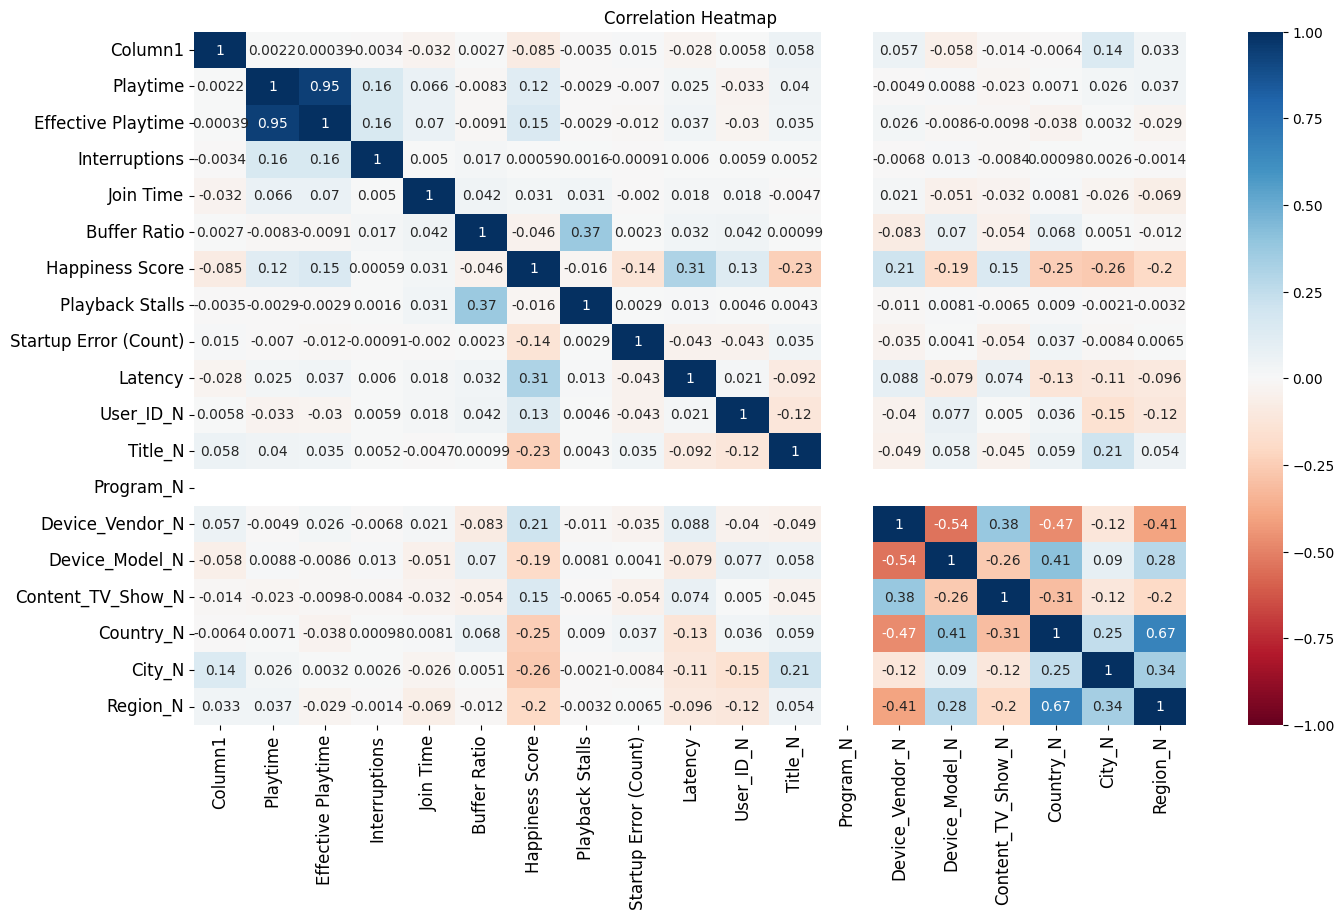

In [ ]:
plt.figure(figsize = (16, 9))
s = sns.heatmap(df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

From the image it can be seen that Column Playtime and Effective Playtime have high correlation and we can say this 2 columns is similar. 

We choose Playtime because it is ground values for Effective Playtime after have influence from Interruptions, Buffer Ratio and any other correlation variable

**QoE Between Interruptions and Playtime**

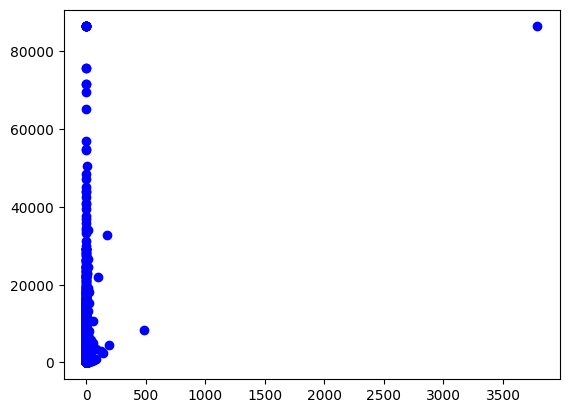

In [ ]:
plt.plot( df["Interruptions"],df["Playtime"], 'bo')

It shows the effect of Interruptions on the Playtime that have direct impact to Effective Playtime and it also shows outliers there

**Show important Value from every column**

In [ ]:
# null values
null_values = df.isnull().sum()
df_nulls = pd.DataFrame({'Column':null_values.index, 'Nulls':null_values.values})

# Count non empty cells
df_count = df_nulls
df_count = df_count.rename(columns={"Nulls": "Count"})
nb_rows = df.shape[0] # 102256
df_count.iloc[:,1] = nb_rows - df_count.iloc[:,1]

# count unique cells
uniqueValues = df.nunique()
df_unique = pd.DataFrame({'Column':uniqueValues.index, 'Unique':uniqueValues.values})

# data types
dty = df.dtypes
df_dty = pd.DataFrame({'Column':dty.index, 'Type':dty.values})

In [ ]:
# merge all together in one dataframe
analyzed_df = pd.concat([df_nulls.iloc[:,0], df_count.iloc[:,1], df_nulls.iloc[:,1], df_unique.iloc[:,1], df_dty.iloc[:,1]], axis = 1)
print(analyzed_df)

                    Column   Count   Nulls  Unique            Type
0                  Column1  102256       0  102256           int64
1               Start Time  102256       0   96503  datetime64[ns]
2                 Playtime  102256       0    4752           int64
3       Effective Playtime  102256       0    4440           int64
4            Interruptions  102256       0      43           int64
5                Join Time  102256       0    5554         float64
6             Buffer Ratio  102256       0    2076         float64
7            CDN Node Host   36979   65277     342          object
8          Connection Type  102256       0      19          object
9                   Device  102256       0      15          object
10             Device Type  102256       0      13          object
11                 Browser  102256       0      15          object
12         Browser Version  101411     845      64          object
13                      OS  102256       0       9          ob

From the result, it can be seen we have several columns containing missing value. It can also be seen column Programn_N just have 1 unique values and we can simply say it adds no value, all Zeros.

We also have both numerical and categorical data, for categorical data, we will encode it using Label Encoding

**3.1 Handling Missing Values**

Find several missing values in columns [CDN Node Host and Browser Version], Drop those columns because they have many missing value. For other column, fill the missing values with other values because we still need them.

Also delete column1 and Program_N.

Delete  Content_TV_Show_N due to the high cardinality.

Delete End Time since we will just use Start Time.

Delete Happiness Value' as Happiness score exists.

Delete Effective Playtime since it came from Interruptions and Playtime

In [6]:
df = df.drop(["Column1", "Effective Playtime", "CDN Node Host", "Browser Version", "Program_N", "End Time", "Happiness Value"], axis = 1)

#Fill Crash Status Column
df["Crash Status"] = df["Crash Status"].astype('category')
df["Crash Status"] = df["Crash Status"].cat.add_categories("No Error Crash").fillna("No Error Crash")
df["Crash Status"] = df["Crash Status"].astype('object')

#fill Happiness Value Column
# df["Happiness Value"] = df["Happiness Value"].astype('category')
# df["Happiness Value"] = df["Happiness Value"].fillna("Angry (0-3)")
# df["Happiness Value"] = df["Happiness Value"].astype('object')

#Fill End Of Playback Status Column
df["End of Playback Status"] = df["End of Playback Status"].astype('category')
df["End of Playback Status"] = df["End of Playback Status"].fillna("On Stop")
df["End of Playback Status"] = df["End of Playback Status"].astype('object')

df.isna().sum()

Start Time                0
Playtime                  0
Interruptions             0
Join Time                 0
Buffer Ratio              0
Connection Type           0
Device                    0
Device Type               0
Browser                   0
OS                        0
OS Version                0
Device ID                 0
Happiness Score           0
Playback Stalls           0
Startup Error (Count)     0
Latency                   0
Crash Status              0
End of Playback Status    0
User_ID_N                 0
Title_N                   0
Device_Vendor_N           0
Device_Model_N            0
Content_TV_Show_N         0
Country_N                 0
City_N                    0
Region_N                  0
dtype: int64

There are no more missing values

In [ ]:
df.shape

(102256, 26)

It can be seen after removing several columns, now the dataset just have 26 columns or variable there

**3.2 Preprocessing Data**

Set Start Time as index for time series data

In [7]:
df.set_index("Start Time", inplace=True)

**3.3 Exploratory Data Analysis (EDA)**

Show the distribution of data in every columns based on histogram and density in numerical data

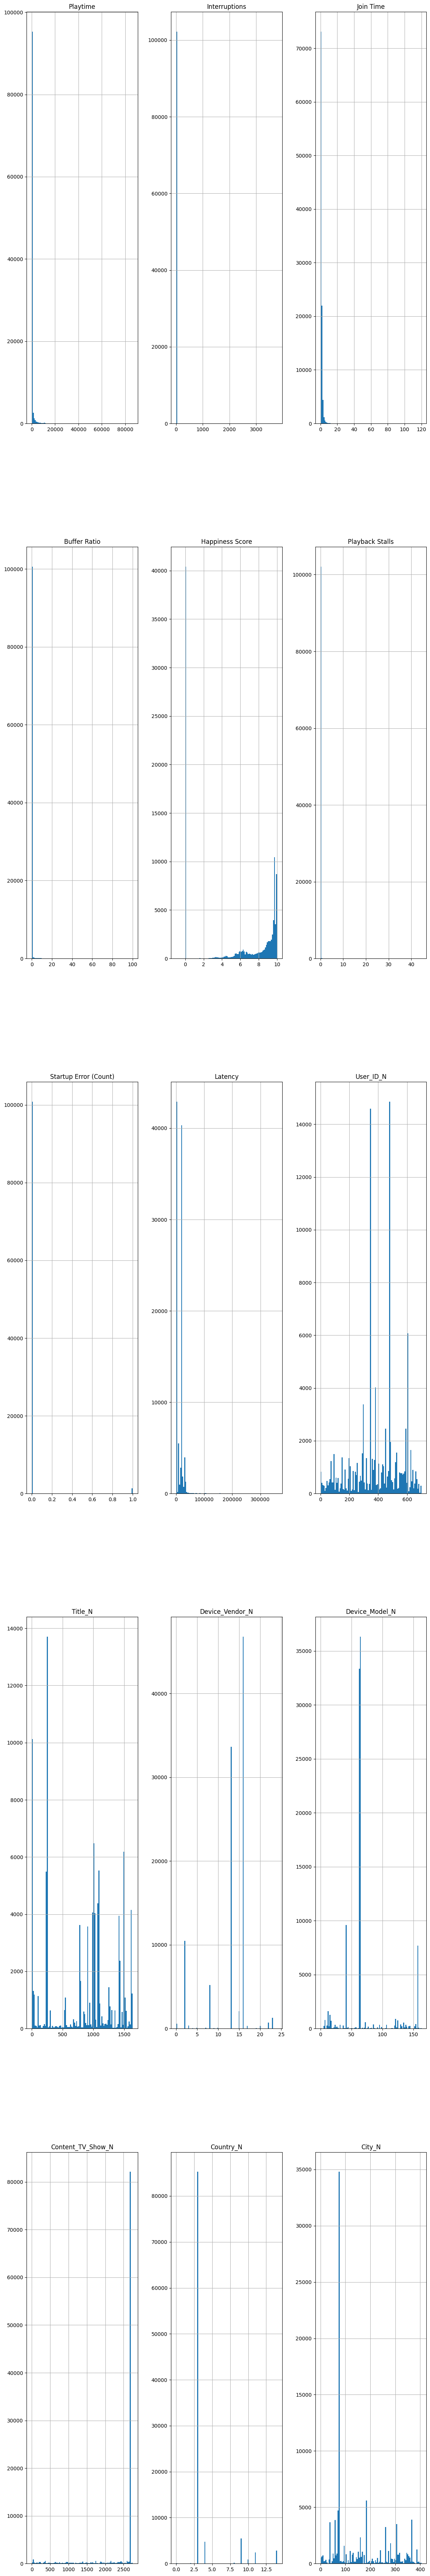

In [ ]:
# Select only float64 and int64 data types
df2 = df.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(len(df2.columns)//3, 3, figsize=(14, 90))

i = 0
for triaxis in axes:
    for axis in triaxis:
        if i < len(df2.columns):
            df2.hist(column = df2.columns[i], bins = 100, ax=axis)
            i = i+1


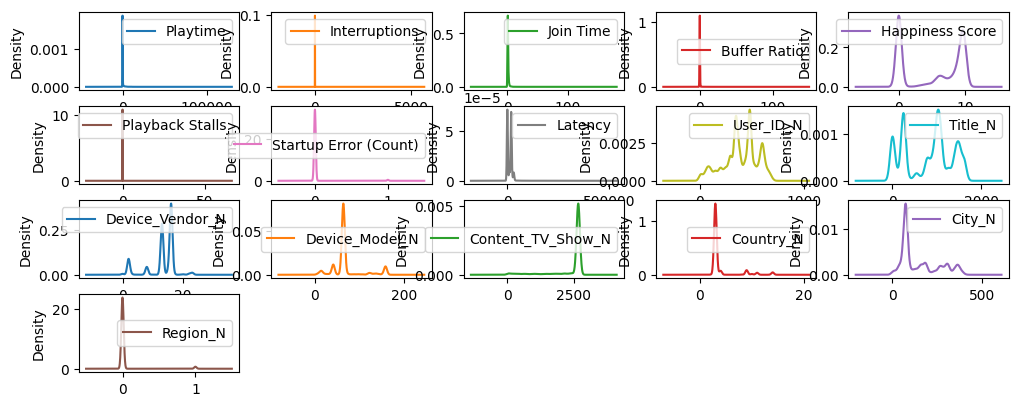

In [ ]:
df2.plot(kind='density',subplots=True,layout=(10,5),figsize=(12,12),sharex=False)
plt.show()

From the images it can be seen that the dataset have so many outliers on each features. Checking the outliers using distribution of data from all of the column including non numerical data

In [ ]:
df.describe()

,Playtime,Interruptions,Join Time,Buffer Ratio,Happiness Score,Playback Stalls,Startup Error (Count),Latency,User_ID_N,Title_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
count,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000
mean,328.965479,0.099544,1.158462,0.261755,5.166843,0.003805,0.013564,13360.818788,392.976686,809.658494,13.127699,69.461704,2421.410568,3.933021,150.772669,0.027676
std,1799.357645,12.007473,2.843884,3.568773,4.381398,0.202198,0.115673,23550.856009,161.309073,527.743379,4.624751,33.347175,631.704165,2.546806,107.740597,0.164043
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.583000,0.000000,0.000000,0.000000,0.000000,0.000000,295.000000,261.000000,13.000000,63.000000,2672.000000,3.000000,76.000000,0.000000
50%,22.000000,0.000000,0.790000,0.000000,6.646500,0.000000,0.000000,17862.000000,383.000000,997.000000,15.000000,64.000000,2672.000000,3.000000,76.000000,0.000000
75%,90.000000,0.000000,1.302000,0.000000,9.607000,0.000000,0.000000,19235.000000,487.000000,1170.250000,16.000000,64.000000,2672.000000,3.000000,240.000000,0.000000
max,86404.000000,3786.000000,120.000000,100.000000,10.000000,44.408000,1.000000,359477.000000,699.000000,1638.000000,24.000000,163.000000,2746.000000,14.000000,405.000000,1.000000


It can be seen there is outlier in the dataset, plot the data to get a better view

<Axes: >

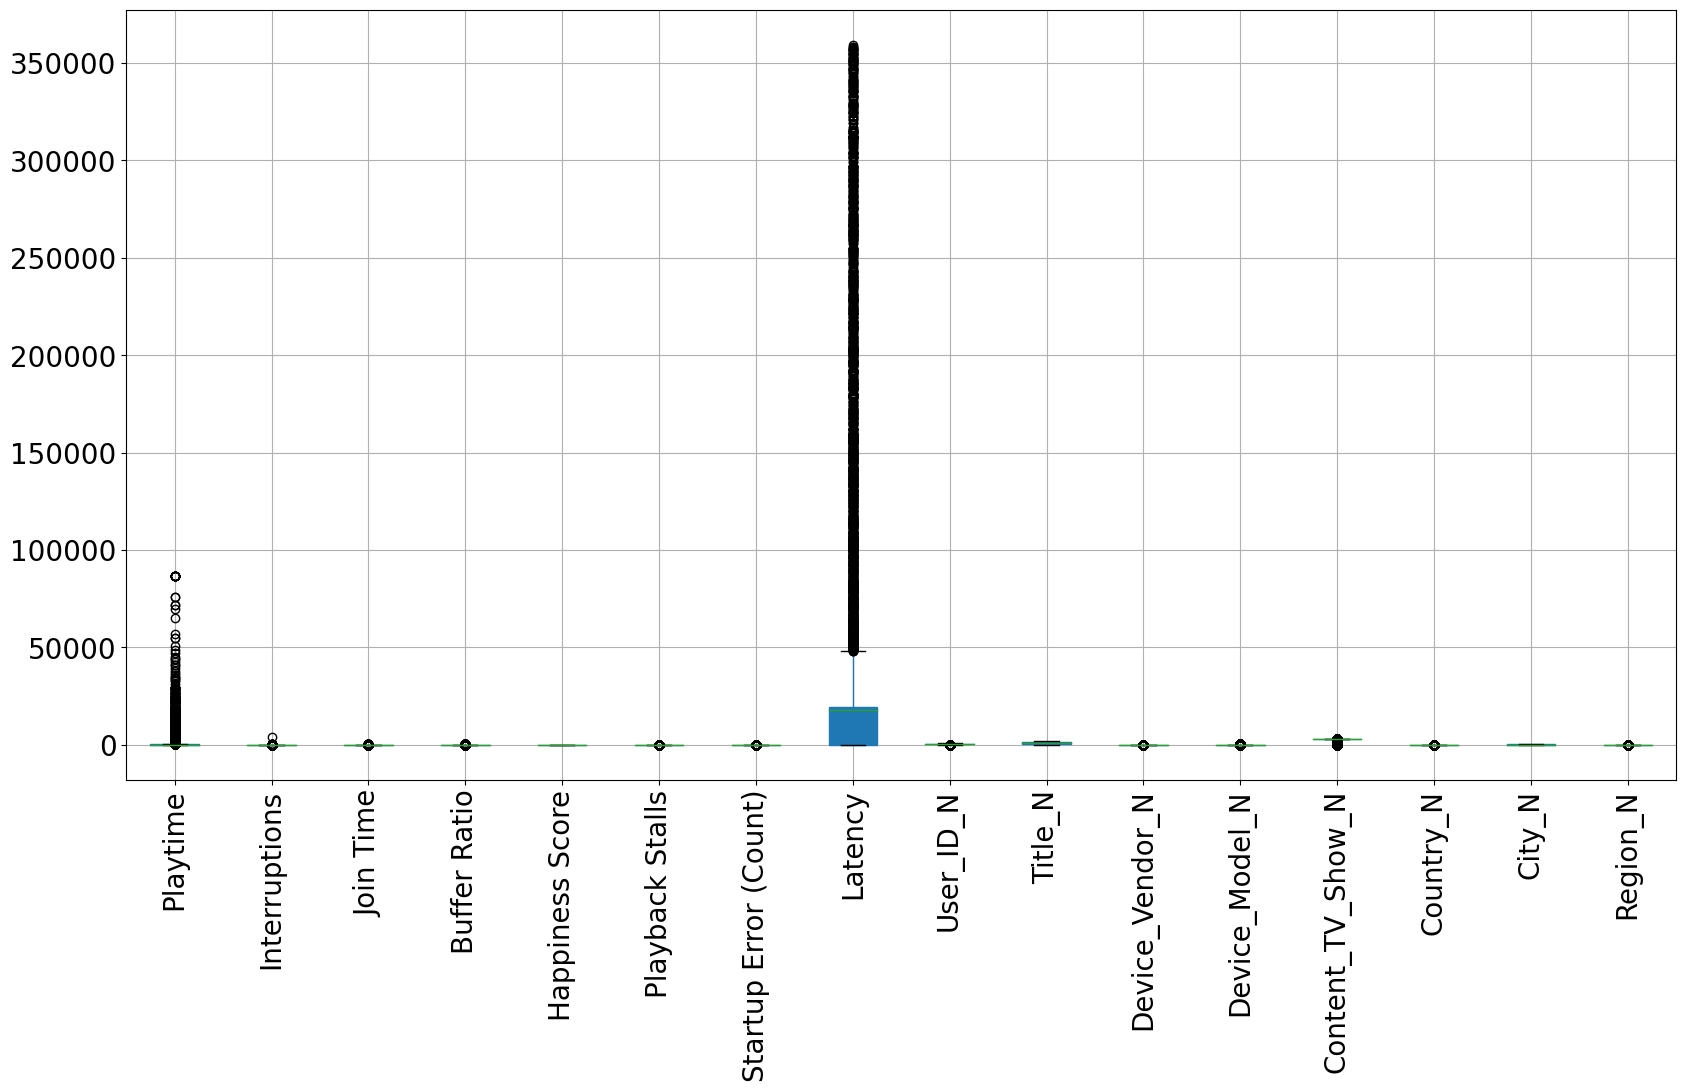

In [ ]:
df.boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

From the graph, it can be seen that the difference of data distribution between each features are really extreme because of the outliers. We will conduct further analysis to show why this outliers happend in the dataset.

**4. Time-Series Decomposition**

The time series dataset is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:
*   Level: The average value in the series.
*   Trend: The increasing or decreasing value in the series.
*   Seasonality: The repeating short-term cycle in the series.
*   Noise: The random variation in the series.

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

The dataset are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

In this section, exploring more about the dataset by decomposition method, we making new variable for a pair of column Playtime and Start Time. Choose Playtime because it represent main feature from time series data. in the following section we will focusing in this for the Time Series analysis.

In [ ]:
ts = df.groupby("Start Time")["Playtime"].sum().rename("playing_time")
ts.head()

Start Time
2022-07-12 00:00:14     11
2022-07-12 00:00:15    241
2022-07-12 00:00:25    124
2022-07-12 00:00:38     73
2022-07-12 00:01:52    254
Name: playing_time, dtype: int64

<Axes: xlabel='Start Time'>

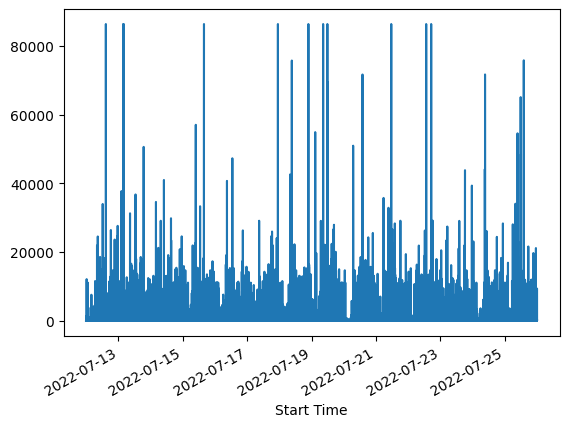

In [ ]:
ts.plot()

Choose periode 7 for weekly period dataset since the dataset just consist of 2 weeks time series data 

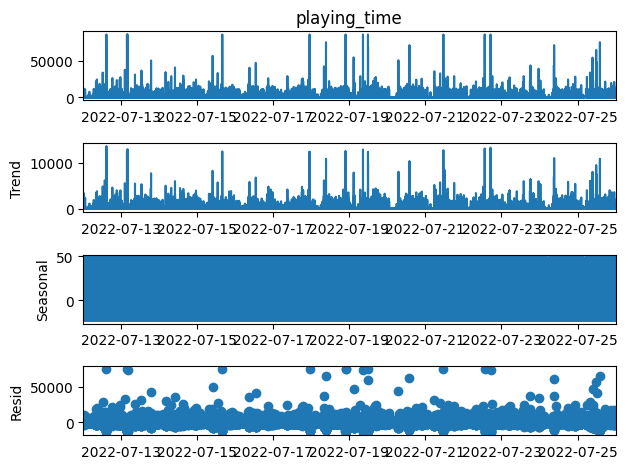

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, period=7)
result.plot()
plt.show()

From the graph it can be seen that the dataset is not Trend or Seasonal time-series, it is highly likely a residual time series. To know more about it, we will digging it further and break it down one-by-one

**4.1 Trend Analysis**

The trend is the component of a time series that represents variations of low frequency in a time series, the high and medium frequency fluctuations having been filtered out.

The objective of this analysis is to understand if there is a trend in the data and whether this pattern is linear or not. The best tool for this job is visualization.

In [ ]:
'''
Plot ts with rolling mean and 95% confidence interval with rolling std.
:parameter    
  :param ts: pandas Series    
  :param window: num - for rolling stats
  :param plot_ma: bool - whether plot moving average
  :param plot_intervals: bool - whether plot upper and lower bounds
'''
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

When the dataset has 2 weeks day of observation, start a rolling window with half of it, which is 7 days:

<ipython-input-27-53b3c5f9e5ce>:17: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.



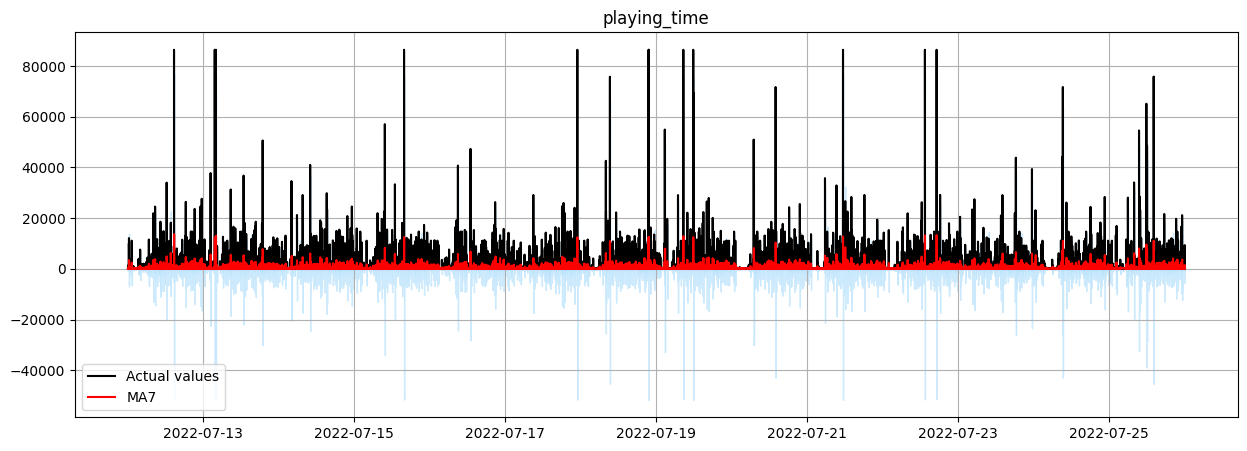

In [ ]:
plot_ts(ts, window=7)

Check at the red line in the plot, it can be seen a pattern similar with the time series plot

<ipython-input-27-53b3c5f9e5ce>:17: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.



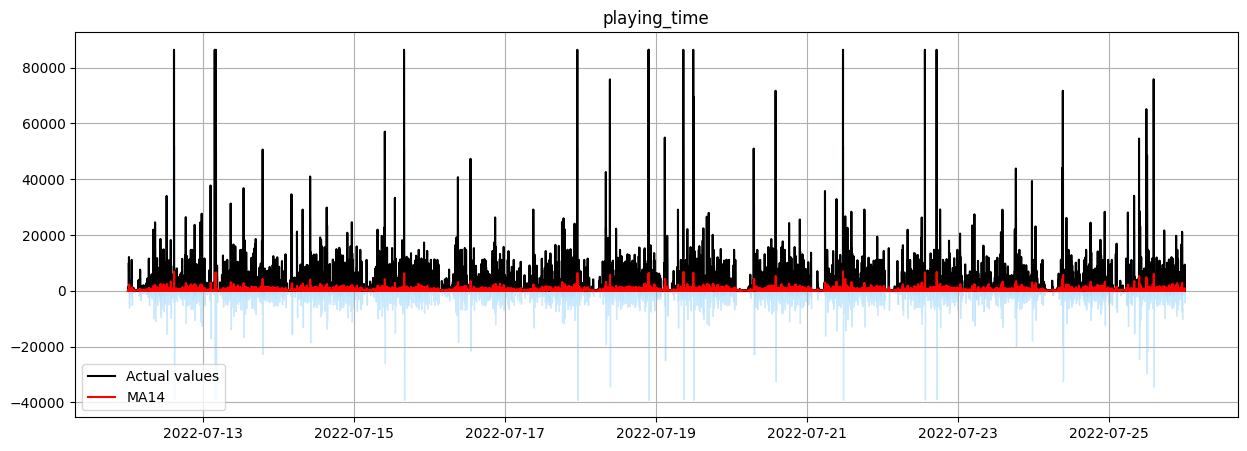

In [ ]:
plot_ts(ts, window=14)

When a rolling window of 2 weeks is used it is obvious getting more similar with the original time series itself. 

This is useful in model design as most of the models require to specify whether the trend component exists and whether it is linear (also said “additive”) or non-linear (also said“multiplicative”).

But is a clear, the dataset not have trend component exists and we can assume it is because the dataset itself is residual time series. 

**4.2 Stationarity Test**

A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time, therefore stationary time series are easier to forecast.

There are several ways to establish whether a time series is stationary or not, the most common are good old visualization, looking at the autocorrelation and running statistical tests.

The most common Autocorrelation test is the Dickey-Fuller test (also called “ADF test”) where the null hypothesis is that the time series has a unit root, in other words, that the time series is not stationary. we will use this method for autocorrelation

In [ ]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(ts, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -56.426
P-value = 0.000
Critical values :
	1%: -3.4304177827253977 - The data is  stationary with 99% confidence
	5%: -2.861569958890621 - The data is  stationary with 95% confidence
	10%: -2.5667859460712474 - The data is  stationary with 90% confidence


From the result it seems the data is stationary, not residual

**4.3 Autocorrelation plots (ACF & PACF)**

Autocorrelation is Correlation which calculated between the variable and itself at previous time steps. This method is important to time series data analysis

An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself.

A partial autocorrelation (PACF) plot represents the amount of correlation between a series and a lag of itself that is not explained by correlations at all lower-order lags.


In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smt

def test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize=(15,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="black", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red",
                            linestyle="--", linewidth=0.7)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], 
                y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax,
                legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, 
                           y1=dtf_ts['lower'].head(sample_size), 
                           y2=dtf_ts['upper'].head(sample_size),
                           color='lightskyblue')
        
        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag,
                                                  autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+
                        '(p value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.plot_pacf(ts, lags=maxlag, ax=pacf_ax, 
                 title="Partial Autocorrelation (for AR component)")
        smt.plot_acf(ts, lags=maxlag, ax=acf_ax,
                 title="Autocorrelation (for MA component)")
        plt.tight_layout()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



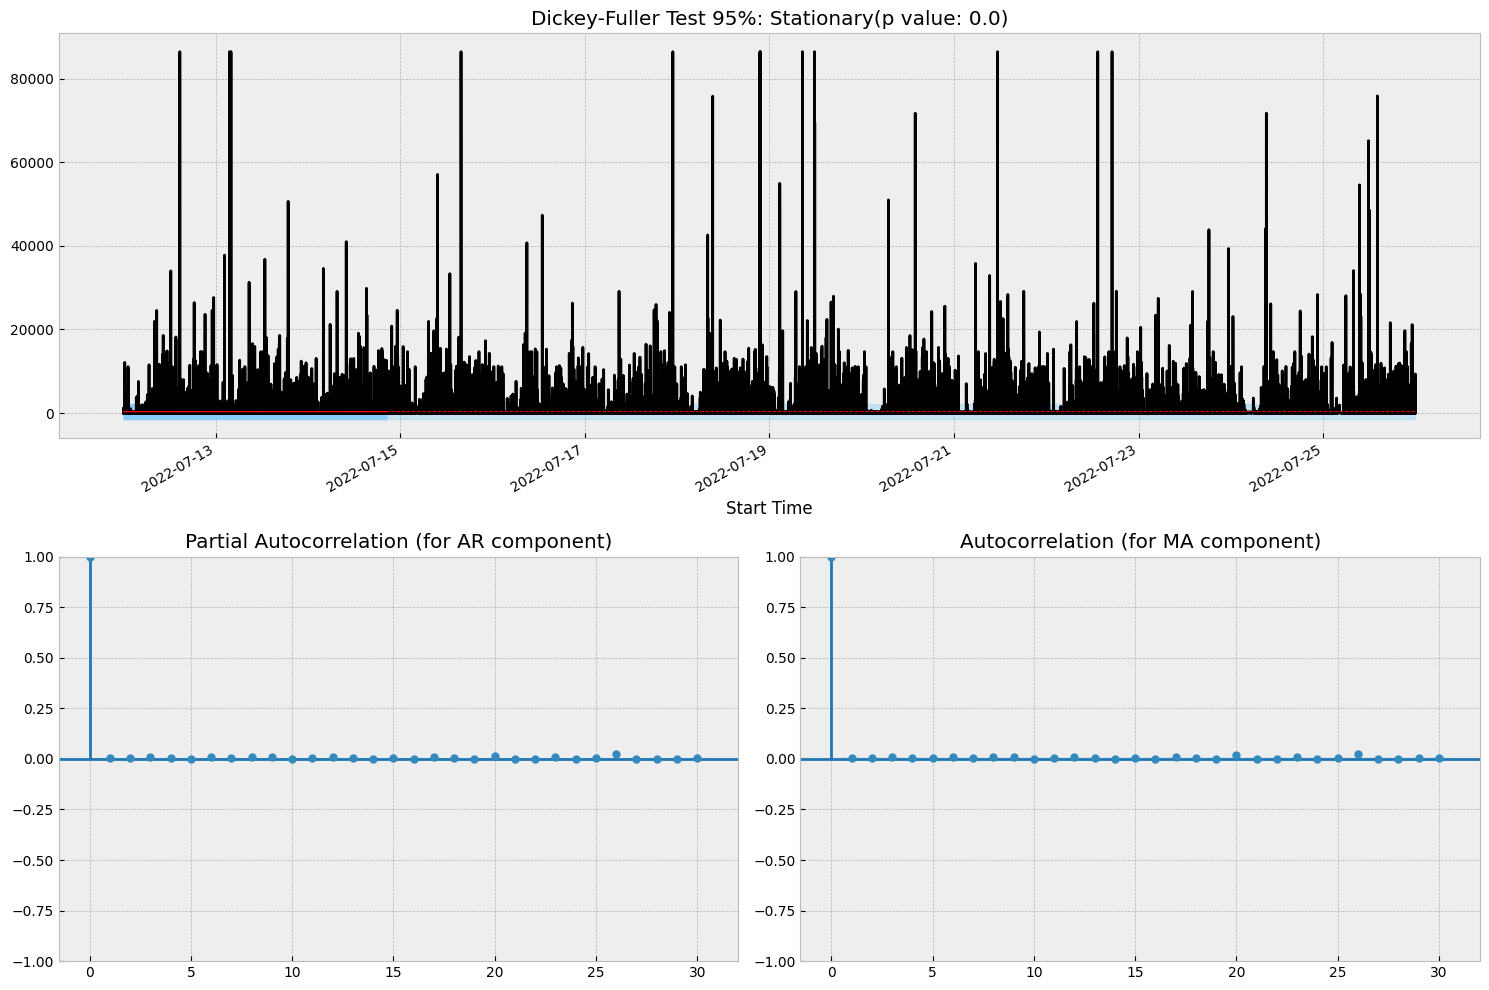

In [ ]:
test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30)

From previous description we know that The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary, which means its properties do not depend on the time at which the series is observed. In the context of the Dickey-Fuller test, the null hypothesis states that the time series has a unit root (i.e., it is non-stationary), while the alternative hypothesis states that it doesn't (i.e., it is stationary).

And a p-value is a measure of the probability that an observed result could have occurred under the null hypothesis. A p-value of 0 is very strong evidence against the null hypothesis.

The Dickey-Fuller test is a statistical test that is commonly used in time series analysis to test whether a given series is stationary. In simpler terms, it tests whether the series has a unit root. A unit root would suggest that the series is non-stationary, meaning it has some form of time-dependent structure such as a trend or seasonality.

And from the result, it shows Dickey-Fuller test at 95%, with p-value is 0. From this result, we can reject the null hypothesis and conclude that the series is stationary. Cause if p-value is greater than 0.05, it will fail to reject the null hypothesis and conclude that the series is non-stationary.

However, in real-world applications, it's almost impossible to get a p-value exactly equal to 0 due to the presence of sampling error. Except, from previous analysis we know that the dataset contains residual. This residual create fluctuation in the data, thus this fluctuation made the time series data in stationary form.

This result prove initial analysis that residual exist in the dataset, it can also be seen, there is no spikes above the blue region, meaning there is no correlation between series and lag itself. This happend caused by the residual itself. We obeserve it again with Seasonality Analysis to ensure what kind of residual exist in the dataset.

**4.4 Seasonality Analysis**

The seasonal component is that part of the variations in a time series representing 2 weeks of fluctuations with respect to timing, direction and magnitude.

The objective of this last section is to understand what kind of seasonality is affecting the data (weekly seasonality if it presents fluctuations every 7 days.

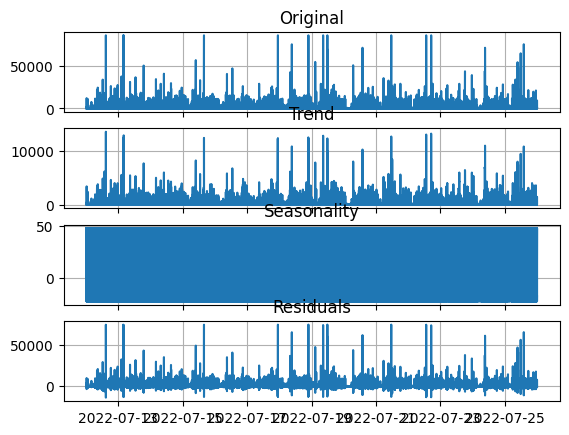

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid   
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False)
ax[0].plot(ts)
ax[0].set_title('Original')
ax[0].grid(True) 
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[1].grid(True)  
ax[2].plot(seasonal)
ax[2].set_title('Seasonality')
ax[2].grid(True)  
ax[3].plot(residual)
ax[3].set_title('Residuals')
ax[3].grid(True)


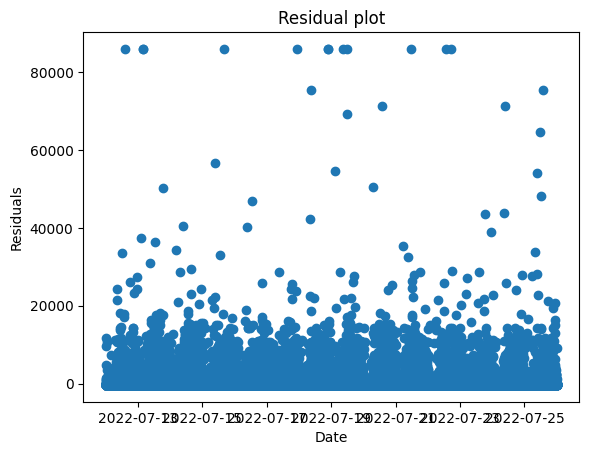

In [ ]:
tss = sm.add_constant(range(len(ts)))
model = sm.OLS(ts, tss).fit()

# Calculate residuals
residuals = model.resid

# Visualize residuals using a scatter plot
plt.scatter(ts.index, residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

If a time series shows a pattern but does not exhibit seasonality, it could be due to other factors such as trends, cycles, or irregular fluctuations. From graph above, it can be seen that the dataset is not trend or seasonality. So, it can be irregular fluctuation data

Irregular fluctuations, also known as noise or residuals, are random fluctuations in the data that cannot be explained by trends, cycles, or seasonality. Irregular fluctuations can be caused by measurement error, random events, or other factors.

But from stationary test we know that this data is in stationary form, which means that the stationary happend because the dataset have irregural fluctuation over the time and become residual data

**5. Time Series Forecasting**

**5.1 Random Forest (RF)**

In this section, we will introduce to one of the most commonly used methods for multivariate time series forecasting – Random Forest (RF)

Random forest algorithm (RF) is an ensemble of decision trees based on the
bagging technique using bootstrap aggregation. The aim is to avoid overfitting considering multiple trees and using all of them to perform predictions. Each tree inside the RF model is trained to fit
to a random sample of rows and columns of the original data. For regression tasks, the mean of each tree response is used. RF is nonlinear and it is robust for noisy data. Moreover, the algorithm was
designed to reduce the variance of errors with a minimal increase in its bias. RF is able to predict future values based on previous values using voting method within its decision tree ensamble. Additionally, implementing RF is as simple as using any other univariate technique.

**Perform Label Encoding for Categorical Data before forecasting**

In [8]:
for i in df.select_dtypes('object').columns:
  le = LabelEncoder().fit(df[i])
  df[i] = le.transform(df[i]) 

df.head()

,Playtime,Interruptions,Join Time,Buffer Ratio,Connection Type,Device,Device Type,Browser,OS,OS Version,Device ID,Happiness Score,Playback Stalls,Startup Error (Count),Latency,Crash Status,End of Playback Status,User_ID_N,Title_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
Start Time,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-12 00:00:14,11,0,0.879,0.0,7,1,10,0,0,0,209,7.393,0.0,0,19504,1,3,564,784,16,64,2672,3,263,0
2022-07-12 00:00:38,73,0,1.170,0.0,16,1,10,0,0,0,387,9.399,0.0,0,19033,1,3,480,1,13,63,2672,3,76,0
2022-07-12 00:02:02,21,0,1.133,0.0,16,1,10,0,0,0,197,6.999,0.0,0,19071,1,3,346,786,13,63,2672,3,76,0
2022-07-12 00:02:24,1,0,0.000,0.0,16,1,10,0,0,0,197,0.000,0.0,0,0,1,3,346,997,13,63,2672,3,76,0
2022-07-12 00:02:25,1,0,0.000,0.0,16,1,10,0,0,0,197,0.000,0.0,0,0,1,3,346,997,13,63,2672,3,76,0


Make sure all data is in stationary form before perform forecasting

In [ ]:
data = df

# Check for stationarity of the time series
def adf_test(series, signif=0.05):
    result = adfuller(series, autolag='AIC')
    pvalue = result[1]
    if pvalue <= signif:
        return True
    else:
        return False

# If any of the series are not stationary, apply differencing until they become stationary
non_stationary_variables = [var for var in data.columns if not adf_test(data[var])]

while len(non_stationary_variables) > 0:
    data = data.diff().dropna()
    non_stationary_variables = [var for var in data.columns if not adf_test(data[var])]

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the multivariate time series data
data = df

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Specify the input features
input_features = data.columns
# Initialize a dictionary to store the predictions for each feature
predictions = {}

# Iterate over each feature
for feature in input_features:
    # Split the train and test data into input features
    train_X = train_data[feature]
    test_X = test_data[feature]
       # Handle missing values in the target variable
    imputer = SimpleImputer(strategy='mean')
    train_X = imputer.fit_transform(train_X.values.reshape(-1, 1))
    test_X = imputer.transform(test_X.values.reshape(-1, 1))

    # Initialize and train the Random Forest model
    model = RandomForestRegressor()
    model.fit(train_X.reshape(-1, 1), train_X.reshape(-1))

    # Perform forecasting on the test data
    feature_predictions = model.predict(test_X.reshape(-1, 1))

    # Store the predictions for the feature
    predictions[feature] = feature_predictions

    # Calculate RMSE (Root Mean Squared Error) as evaluation metric
    rmse = sqrt(mean_squared_error(test_X.reshape(-1), feature_predictions))
    print(f'Test RMSE for {feature}: %.3f' % rmse)

# Plot the actual and predicted values for each feature
# for feature, feature_predictions in predictions.items():
#     test_data['predicted_' + feature] = feature_predictions
#     test_data[[feature, 'predicted_' + feature]].plot()


Test RMSE for Playtime: 27.504
Test RMSE for Interruptions: 0.240
Test RMSE for Join Time: 0.024
Test RMSE for Buffer Ratio: 0.012
Test RMSE for Connection Type: 0.017
Test RMSE for Device: 0.000
Test RMSE for Device Type: 0.000
Test RMSE for Browser: 0.001
Test RMSE for OS: 0.000
Test RMSE for OS Version: 0.029
Test RMSE for Device ID: 0.240
Test RMSE for Happiness Score: 0.007
Test RMSE for Playback Stalls: 0.012
Test RMSE for Startup Error (Count): 0.000
Test RMSE for Latency: 15.559
Test RMSE for Crash Status: 0.000
Test RMSE for End of Playback Status: 0.000
Test RMSE for User_ID_N: 0.175
Test RMSE for Title_N: 0.122
Test RMSE for Device_Vendor_N: 0.020
Test RMSE for Device_Model_N: 0.091
Test RMSE for Content_TV_Show_N: 0.293
Test RMSE for Country_N: 0.000
Test RMSE for City_N: 0.155
Test RMSE for Region_N: 0.000


From the RMSE result it can be seen Playtime have the worst result with 27.504 RMSE and Latency have the second worst result with 15.559 RMSE

This two features have the worst RMSE shows correlation between this two. It means this two features is the cause of irregular fluctuation appear over the time in the given dataset.

save forecast result as dataframe for change detection

In [32]:
forecast_dff = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
forecast_dff.head()

,Playtime,Interruptions,Join Time,Buffer Ratio,Connection Type,Device,Device Type,Browser,OS,OS Version,Device ID,Happiness Score,Playback Stalls,Startup Error (Count),Latency,Crash Status,End of Playback Status,User_ID_N,Title_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
Start Time,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-22 22:13:55,1.0,0.0,0.659,0.0,7.0,1.0,10.0,0.0,0.0,0.0,776.0,0.000,0.0,0.0,0.00,1.0,3.0,196.0,997.0,16.0,64.0,2672.0,3.0,338.0,0.0
2022-07-22 22:13:50,6.0,0.0,1.852,0.0,7.0,0.0,6.0,0.0,0.0,0.0,154.0,0.000,0.0,0.0,11205.64,1.0,3.0,363.0,1528.0,16.0,41.0,1594.0,3.0,21.0,0.0
2022-07-22 22:13:57,1.0,0.0,0.629,0.0,7.0,1.0,10.0,0.0,0.0,0.0,776.0,0.000,0.0,0.0,0.00,1.0,3.0,196.0,1412.0,16.0,64.0,2672.0,3.0,338.0,0.0
2022-07-22 22:08:11,349.0,0.0,0.530,0.0,7.0,1.0,10.0,0.0,0.0,0.0,169.0,9.947,0.0,0.0,18286.00,1.0,3.0,290.0,997.0,16.0,64.0,2672.0,3.0,282.0,0.0
2022-07-22 22:14:01,0.0,0.0,0.000,0.0,7.0,1.0,10.0,0.0,0.0,0.0,169.0,0.000,0.0,0.0,0.00,1.0,3.0,290.0,1077.0,16.0,64.0,2672.0,3.0,282.0,0.0


**5.1.1 Change Detection Binary Segmentation Method**

This experiment using change detection method from Ruptures library

In [26]:
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00


Binary Segmentation based method have consistent estimation of the number
and locations of multiple change-points in data. It assume that the number of change-points can increase to infinity with the sample size. Due to a certain random localisation mechanism. 

We perform change detection between on forecast data using binary segmentation method

Change points for Playtime: [505, 510, 525, 555, 575, 585, 775, 780, 1035, 1155, 1160, 1180, 1185, 1250, 1260, 1265, 1270, 1305, 1310, 1715, 1720, 1725, 2275, 2310, 2315, 2665, 2670, 2675, 3035, 3045, 3110, 3115, 3225, 3230, 4215, 4220, 4225, 4230, 4300, 4305, 4310, 5530, 5540, 5560, 6020, 6025, 6100, 6105, 6660, 6665, 6760, 6770, 6775, 6785, 6790, 6925, 6935, 7020, 7035, 7040, 7045, 7070, 7075, 7975, 7980, 8050, 8055, 8165, 8170, 8490, 8790, 8795, 8800, 8850, 8855, 8865, 8870, 9210, 9220, 9260, 9390, 9435, 10285, 10290, 10425, 10435, 11600, 11605, 11610, 11680, 11685, 11755, 11845, 11855, 11860, 11865, 11870, 11925, 11930, 11940, 11945, 12010, 12020, 12025, 12035, 12080, 12085, 12095, 12100, 12165, 12180, 12480, 12485, 12495, 12505, 12585, 12590, 12600, 12605, 12670, 12675, 12940, 12945, 12965, 12970, 12990, 12995, 13980, 13985, 15115, 15125, 15145, 15150, 15725, 15730, 15755, 15760, 15810, 15815, 15820, 15825, 15830, 16565, 16570, 16620, 16625, 16790, 16795, 16800, 16805, 16820, 1683

<Figure size 1000x600 with 0 Axes>

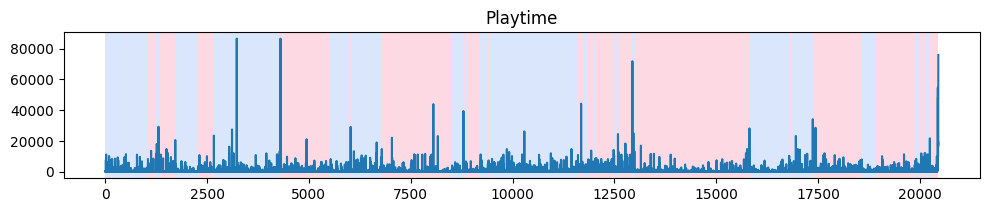

Change points for Interruptions: [935, 940, 2290, 2295, 2310, 2315, 2640, 2645, 4405, 4410, 4455, 4460, 5910, 5915, 6100, 6105, 6275, 6280, 6300, 6305, 6360, 6365, 6515, 6520, 6550, 8625, 8630, 8655, 8660, 9005, 9050, 9085, 9210, 9235, 9240, 9245, 9310, 9315, 10140, 10145, 11865, 11870, 11925, 11930, 11945, 13460, 13470, 13475, 13480, 13505, 13520, 13595, 13600, 13605, 13610, 13615, 13640, 13645, 13660, 13670, 13675, 13680, 13800, 13805, 13825, 13830, 13840, 13845, 13990, 14020, 14025, 14125, 14150, 14155, 14160, 14190, 14195, 14465, 14470, 14475, 14480, 14485, 14490, 14495, 14535, 14540, 14555, 14565, 14825, 14830, 14835, 14840, 14850, 14860, 14865, 14900, 14905, 14910, 14940, 14945, 14960, 14965, 14970, 14995, 15065, 15070, 15155, 15160, 15170, 15180, 15320, 15325, 15345, 15350, 15360, 15375, 15450, 15460, 15535, 15540, 15545, 15550, 15555, 15560, 15565, 15660, 15665, 15670, 15715, 15735, 15740, 15775, 15780, 15905, 15910, 15935, 15940, 16145, 16160, 16165, 16200, 16210, 16215, 16235

<Figure size 1000x600 with 0 Axes>

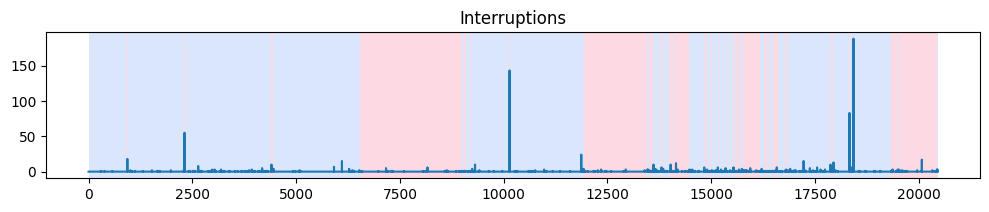

Change points for Join Time: [265, 725, 730, 745, 750, 905, 1595, 2425, 2555, 2560, 2580, 2620, 2725, 2775, 2825, 2830, 2835, 2840, 2870, 2915, 2920, 2925, 2930, 2980, 2995, 3000, 3145, 3165, 3170, 3190, 3195, 3335, 3370, 3375, 3410, 3445, 3455, 3460, 3475, 3570, 3840, 3865, 3880, 3920, 3925, 3995, 4000, 4005, 4560, 4565, 4760, 4765, 4775, 4815, 5090, 5100, 5150, 5970, 6245, 6750, 6995, 7020, 7910, 8260, 9435, 9645, 9655, 13390, 13455, 13655, 13660, 13685, 13700, 13725, 13735, 13785, 13790, 13800, 13805, 13810, 13820, 13825, 13845, 13860, 13885, 13920, 13925, 13930, 13935, 13950, 13975, 13980, 13995, 14005, 14015, 14020, 14025, 14110, 14290, 14475, 14480, 14525, 14675, 14685, 14690, 14810, 14825, 14835, 14860, 14865, 14910, 14920, 15165, 15170, 15175, 15180, 15195, 15210, 15320, 15325, 15345, 15400, 15405, 15420, 15430, 15435, 15440, 15450, 15455, 15505, 15535, 15540, 15580, 15585, 15595, 15600, 15645, 15655, 15660, 15665, 15670, 15685, 15690, 15715, 15740, 15750, 15795, 15830, 15860, 

<Figure size 1000x600 with 0 Axes>

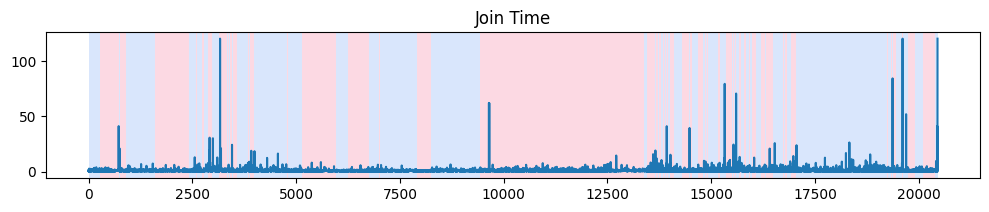

Change points for Buffer Ratio: [2290, 2295, 2885, 2895, 2935, 2940, 2950, 2955, 2980, 4255, 4265, 4305, 4315, 6295, 6300, 6305, 6390, 6395, 6400, 6405, 6515, 6520, 6525, 6530, 6535, 6585, 6590, 7205, 7210, 7215, 7220, 7225, 8630, 8635, 8640, 8645, 8650, 8655, 8660, 8915, 8920, 9050, 9075, 9085, 9225, 9235, 9260, 9265, 9390, 9395, 10640, 10645, 10650, 10655, 11025, 11030, 13460, 13480, 13640, 13645, 13660, 13665, 13670, 13680, 13800, 13805, 13810, 13825, 13830, 13840, 13845, 13920, 13935, 13990, 13995, 14015, 14025, 14055, 14060, 14150, 14155, 14170, 14175, 14365, 14370, 14380, 14385, 14440, 14445, 14450, 14475, 14485, 14495, 14535, 14540, 14545, 14560, 14565, 14830, 14835, 14840, 14845, 14865, 14870, 14880, 14885, 14890, 14895, 14910, 14940, 14945, 14950, 14955, 14960, 14965, 15000, 15005, 15010, 15015, 15020, 15030, 15035, 15050, 15055, 15065, 15070, 15170, 15180, 15200, 15205, 15320, 15325, 15360, 15365, 15370, 15375, 15455, 15460, 15465, 15470, 15490, 15495, 15500, 15545, 15550, 15

<Figure size 1000x600 with 0 Axes>

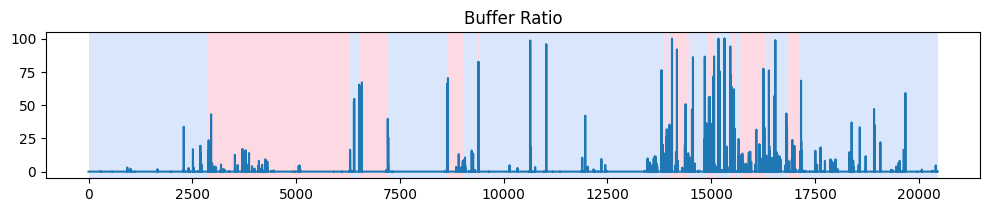

Change points for Connection Type: [95, 170, 225, 330, 350, 405, 625, 645, 790, 815, 835, 900, 960, 1010, 1145, 1495, 1690, 1915, 1945, 2045, 2065, 2080, 2265, 2315, 2340, 2665, 2715, 2740, 2820, 2885, 3270, 3370, 3790, 3840, 3855, 4095, 4130, 4200, 4265, 4280, 4330, 4375, 4450, 4795, 4830, 4895, 4985, 5005, 5035, 5105, 5125, 5150, 5210, 5290, 5310, 5645, 5675, 5695, 5790, 5920, 5945, 6010, 6310, 6410, 6495, 6550, 6570, 6595, 6620, 6650, 6715, 6735, 6790, 6825, 6915, 7015, 7260, 7315, 7335, 7430, 7480, 7525, 7535, 7565, 7595, 7620, 7640, 7715, 7830, 7855, 7950, 8055, 8075, 8115, 8165, 8215, 8250, 8305, 8445, 8515, 8550, 8565, 8585, 8600, 8710, 8735, 8770, 8805, 8825, 8855, 8885, 8905, 8910, 9225, 9255, 9315, 9365, 9395, 9545, 9610, 9745, 9760, 9790, 9835, 9950, 10475, 10495, 10635, 10685, 10785, 11050, 11180, 11610, 11645, 11770, 11830, 12065, 12095, 12120, 12125, 12225, 12260, 12285, 12305, 12580, 12630, 12710, 12750, 13125, 13135, 13445, 13525, 13575, 13645, 14115, 14185, 14245, 1427

<Figure size 1000x600 with 0 Axes>

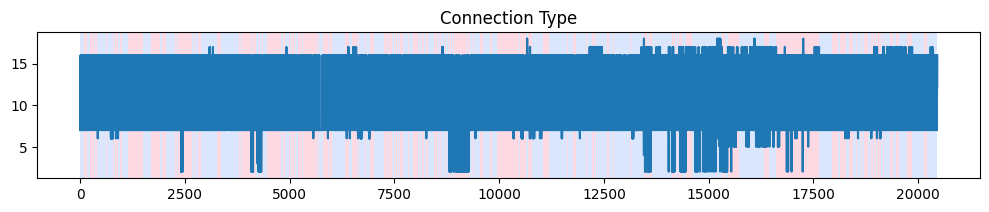

Change points for Device: [35, 550, 570, 1715, 1840, 1845, 1990, 2010, 2280, 2300, 2405, 2440, 2555, 2740, 2780, 3085, 3095, 3410, 3510, 3620, 4025, 4095, 4120, 4245, 4265, 4280, 4310, 4325, 4335, 4740, 4765, 4785, 4895, 4910, 4930, 4940, 5060, 5095, 5220, 5235, 5320, 5340, 5355, 5365, 5370, 5400, 5475, 5480, 5490, 5510, 5545, 5570, 5575, 5600, 5970, 5985, 6025, 6035, 6060, 6115, 6120, 6125, 6200, 6210, 6220, 6225, 6235, 6245, 6300, 6360, 6480, 6485, 6495, 6525, 6570, 6590, 7290, 7305, 7325, 8775, 8780, 8785, 8810, 8825, 8855, 8995, 9020, 9040, 9095, 9185, 9195, 9215, 9240, 9255, 9280, 11380, 11420, 11425, 12185, 12205, 12210, 12225, 12280, 12285, 12365, 12440, 12455, 13445, 13450, 13465, 13480, 13490, 13530, 13610, 13660, 13680, 13700, 13740, 13785, 13800, 13810, 13840, 13860, 13875, 13880, 13920, 13925, 13950, 13965, 13985, 14015, 14150, 14185, 14260, 14295, 14320, 14330, 14350, 14405, 14495, 14525, 14575, 14605, 14735, 14850, 15170, 15345, 15500, 15535, 15565, 15600, 15630, 15750, 1

<Figure size 1000x600 with 0 Axes>

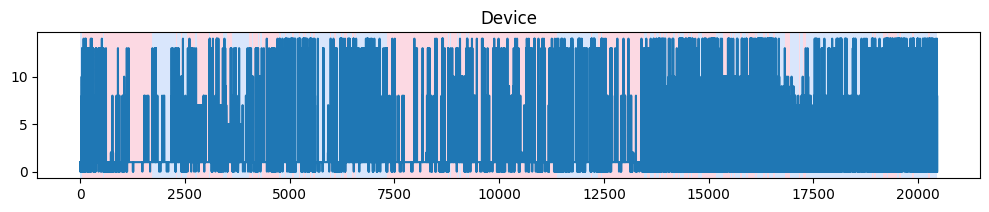

Change points for Device Type: [45, 80, 320, 610, 645, 745, 840, 860, 875, 935, 945, 1010, 1050, 1065, 1780, 1840, 1845, 1990, 2010, 2275, 2300, 2390, 2410, 2420, 2445, 2545, 2555, 2575, 2740, 2775, 2790, 2825, 2840, 2870, 3005, 3130, 3150, 3190, 3365, 3390, 3410, 3435, 3465, 3515, 3530, 3545, 3595, 3605, 3755, 3780, 4070, 4105, 4120, 4250, 4255, 4265, 4280, 4310, 4325, 4330, 4600, 4665, 5005, 5105, 5135, 5280, 5310, 5340, 5350, 5365, 5375, 5405, 5535, 5570, 5575, 5610, 5915, 5920, 6020, 6035, 6060, 6065, 6120, 6135, 6190, 6345, 6365, 6665, 6690, 7290, 7340, 8605, 8625, 8635, 8735, 8755, 8810, 8825, 8850, 8855, 8975, 9000, 9010, 9020, 9040, 9045, 9065, 9085, 9090, 9095, 9180, 9190, 9195, 9200, 9215, 9230, 9245, 9255, 9270, 10915, 11025, 11030, 11370, 11485, 11510, 11525, 11535, 11545, 11590, 11610, 12350, 12465, 12590, 13460, 13510, 13530, 13610, 13620, 13690, 13765, 13770, 13965, 14015, 14040, 14070, 14105, 14115, 14135, 14155, 14165, 14180, 14215, 14245, 14330, 14390, 14410, 14450, 1

<Figure size 1000x600 with 0 Axes>

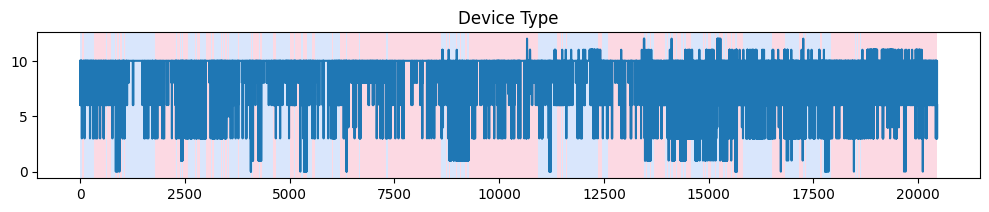

Change points for Browser: [45, 290, 300, 315, 550, 570, 730, 745, 770, 780, 1780, 1840, 1845, 4895, 4940, 5060, 5095, 5220, 5235, 5315, 5340, 5355, 5365, 5370, 5400, 5475, 5510, 5600, 5970, 5980, 5985, 6115, 6120, 6125, 6200, 6220, 6245, 6305, 6365, 6480, 6485, 6495, 6525, 6570, 6590, 6625, 6635, 6690, 6710, 6715, 6895, 6905, 6910, 7290, 7295, 7305, 7325, 8635, 8660, 10330, 10335, 10340, 10350, 10535, 10545, 10555, 10560, 10645, 10655, 10730, 10750, 10765, 11005, 11040, 11380, 11500, 11505, 12185, 12230, 12280, 12285, 12320, 12325, 12440, 12455, 13445, 13450, 13465, 13480, 13640, 13680, 13700, 13745, 13880, 13920, 13925, 13950, 13965, 13985, 14015, 14100, 14265, 14295, 14315, 14330, 14355, 14465, 14485, 14490, 14495, 14530, 14575, 14820, 14840, 14845, 14850, 14865, 14900, 14930, 15000, 15025, 15065, 15180, 15185, 15190, 15200, 15225, 15245, 15250, 15465, 15480, 15500, 15730, 15795, 15855, 15865, 15875, 15890, 15915, 15945, 15995, 16090, 16100, 16115, 16135, 16150, 16165, 16180, 16185,

<Figure size 1000x600 with 0 Axes>

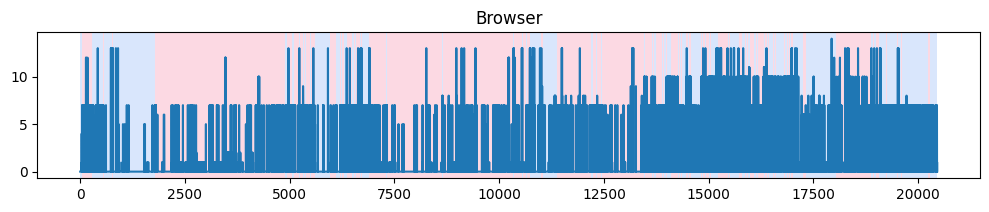

Change points for OS: [550, 570, 730, 745, 770, 780, 1780, 1840, 1845, 1980, 1990, 2010, 2265, 2280, 2300, 3005, 3085, 3095, 3260, 3275, 3455, 3480, 4025, 4280, 4335, 4895, 4910, 4930, 4940, 5060, 5095, 5220, 5235, 5320, 5335, 5400, 5475, 5510, 5570, 5575, 5600, 5970, 5985, 6025, 6035, 6060, 6115, 6120, 6125, 6200, 6220, 6245, 6300, 6365, 6480, 6485, 6495, 6525, 6620, 6625, 6635, 6665, 6710, 6715, 6895, 6905, 6910, 7290, 7305, 7325, 8775, 8855, 8970, 8975, 8980, 9280, 10330, 10350, 10535, 10545, 10555, 10560, 10640, 10645, 10655, 10730, 10750, 10765, 11005, 11040, 11380, 11420, 11425, 11605, 11610, 11735, 11750, 11755, 11885, 11980, 12185, 12205, 12210, 12225, 12255, 12280, 12285, 12365, 12440, 12455, 13445, 13450, 13465, 13490, 13530, 13610, 13875, 13880, 13920, 13925, 13950, 13965, 14015, 14065, 14070, 14115, 14215, 14295, 14320, 14330, 14405, 14495, 14530, 14575, 14605, 14735, 14850, 15180, 15190, 15200, 15210, 15235, 15250, 15280, 15300, 15345, 15500, 15525, 15565, 15750, 15805, 15

<Figure size 1000x600 with 0 Axes>

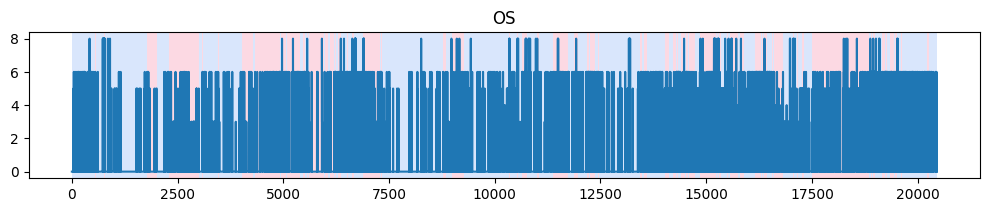

Change points for OS Version: [35, 45, 50, 55, 550, 560, 570, 730, 745, 770, 780, 2265, 3085, 3095, 3610, 4025, 4280, 4335, 4895, 4910, 4930, 4935, 4945, 5060, 5065, 5070, 5075, 5080, 5095, 5220, 5235, 5320, 5340, 5355, 5365, 5370, 5380, 5400, 5475, 5480, 5490, 5510, 5590, 5595, 5600, 5970, 5980, 5985, 6025, 6060, 6115, 6120, 6125, 6200, 6210, 6220, 6225, 6235, 6240, 6245, 6305, 6365, 6480, 6485, 6495, 6525, 6620, 6625, 6635, 6650, 6710, 6715, 6895, 6905, 6910, 7290, 7295, 7300, 7305, 7325, 8775, 8780, 8785, 8970, 8975, 8980, 9280, 10330, 10340, 10350, 10535, 10545, 10555, 10560, 10645, 10655, 10730, 10740, 10750, 10765, 11005, 11040, 11380, 11420, 11425, 11445, 11450, 11455, 11480, 11485, 11605, 11610, 11720, 11735, 11750, 11755, 11865, 11940, 11945, 11965, 11970, 11975, 12185, 12225, 12255, 12285, 12440, 12455, 13445, 13615, 13680, 13685, 13695, 13700, 13740, 13875, 13880, 13920, 13925, 13950, 13965, 14010, 14215, 14295, 14405, 14575, 15175, 15180, 15185, 15190, 15200, 15275, 15280, 

<Figure size 1000x600 with 0 Axes>

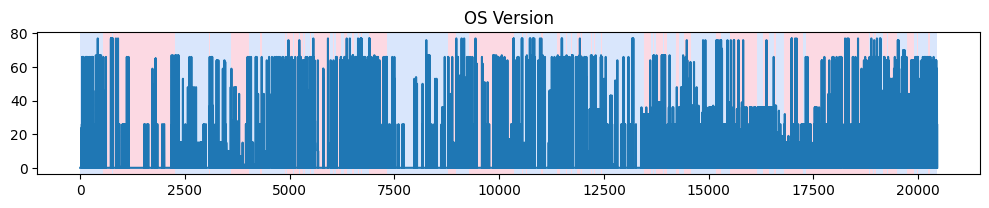

Change points for Device ID: [50, 80, 105, 205, 855, 875, 895, 905, 1005, 1535, 1675, 1910, 1955, 2040, 2155, 2195, 2240, 3255, 3300, 3405, 3410, 3580, 3595, 3675, 3780, 3840, 3940, 3990, 4225, 4255, 4340, 4375, 4415, 4460, 4510, 4530, 4650, 4750, 4775, 4795, 4815, 4910, 5150, 5210, 5220, 5340, 5445, 5475, 5540, 5570, 5610, 5670, 5760, 5790, 5895, 5920, 5940, 5985, 6005, 6075, 6550, 6575, 6790, 6820, 6920, 6990, 7210, 7230, 7265, 7315, 7415, 7445, 7465, 7565, 7585, 7600, 7630, 7645, 7720, 7805, 7850, 7870, 7930, 7950, 8015, 8075, 8095, 8105, 8115, 8140, 8165, 8175, 8235, 8300, 8360, 8380, 8395, 8710, 8735, 8810, 9150, 9190, 9270, 9310, 9460, 9520, 9525, 9750, 9855, 10115, 10175, 10195, 10220, 10235, 10255, 10270, 10285, 10335, 10515, 10545, 10560, 10600, 10635, 10785, 10890, 10895, 10960, 10980, 11015, 11070, 11095, 11115, 11190, 11270, 11305, 11350, 11405, 11485, 11580, 11650, 11700, 11740, 11780, 11825, 11850, 11995, 12080, 12130, 12170, 12215, 12305, 12580, 12630, 12710, 12750, 1276

<Figure size 1000x600 with 0 Axes>

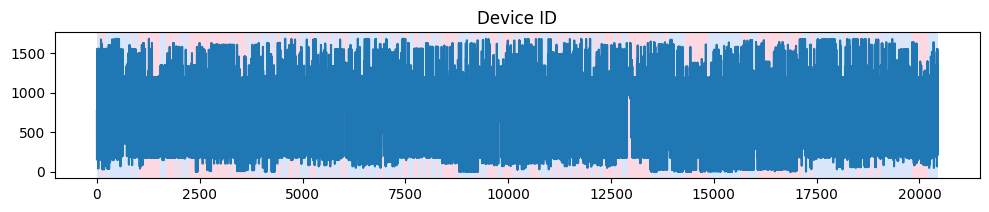

Change points for Happiness Score: [45, 95, 230, 250, 310, 320, 395, 460, 485, 520, 535, 585, 705, 860, 905, 960, 980, 1050, 1765, 1775, 1935, 1995, 2015, 2080, 2195, 2265, 2430, 2470, 2740, 2775, 3125, 3245, 3275, 3300, 3375, 3405, 3435, 3480, 3575, 3755, 3780, 3900, 3970, 3980, 4000, 4025, 4080, 4090, 4125, 4140, 4160, 4195, 4230, 4340, 4375, 4420, 4440, 4650, 4775, 4825, 4850, 4925, 5150, 5235, 5280, 5360, 5370, 5425, 5435, 5565, 6655, 6670, 6880, 7505, 7600, 7700, 7725, 7925, 7935, 7950, 8055, 8075, 8115, 8165, 8215, 8250, 8415, 8475, 8640, 8765, 8810, 8825, 8860, 8885, 8915, 8955, 8960, 8975, 9085, 9170, 9210, 9280, 9395, 9480, 9490, 9625, 9765, 9845, 9850, 9885, 9890, 10135, 10275, 10285, 10515, 10580, 10635, 10640, 10795, 10810, 10935, 11045, 11290, 11450, 11485, 11735, 11845, 12070, 12155, 12320, 12400, 12770, 12880, 13030, 13450, 13470, 13530, 13615, 13655, 13700, 13750, 15060, 15500, 15525, 15545, 15565, 15830, 15850, 15910, 15930, 16160, 16335, 16410, 16590, 16595, 17145, 17

<Figure size 1000x600 with 0 Axes>

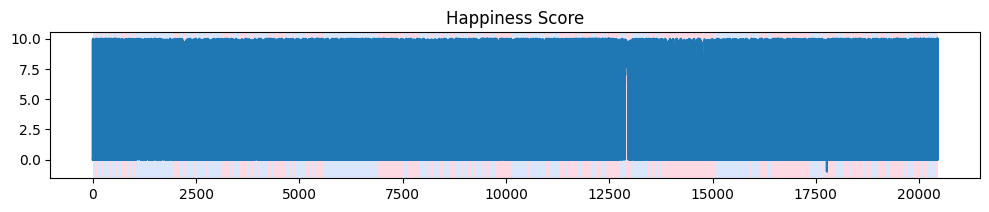

Change points for Playback Stalls: [2290, 2295, 2885, 2890, 2895, 2935, 2940, 2950, 2955, 4255, 4265, 4305, 4315, 6295, 6300, 6305, 6390, 6395, 6400, 6405, 6515, 6520, 6525, 6530, 6535, 6585, 6590, 7205, 7210, 7215, 7220, 7225, 8630, 8635, 8640, 8645, 8650, 8655, 8660, 8915, 8920, 9050, 9060, 9065, 9070, 9075, 9085, 9225, 9235, 9260, 9265, 9390, 9395, 10640, 10645, 10650, 10655, 11025, 11030, 13460, 13480, 13640, 13645, 13665, 13670, 13700, 13800, 13805, 13810, 13920, 13935, 13990, 13995, 14015, 14020, 14055, 14060, 14170, 14175, 14365, 14370, 14380, 14385, 14440, 14445, 14450, 14535, 14540, 14545, 14560, 14565, 14825, 14840, 14845, 14865, 14870, 14880, 14885, 14890, 14895, 14900, 14940, 14945, 14950, 14955, 14960, 14965, 14970, 15000, 15005, 15010, 15020, 15030, 15035, 15050, 15055, 15060, 15065, 15070, 15170, 15175, 15180, 15200, 15205, 15320, 15325, 15360, 15365, 15370, 15375, 15455, 15460, 15465, 15470, 15490, 15495, 15500, 15545, 15550, 15555, 15560, 15565, 15660, 15665, 15905, 15

<Figure size 1000x600 with 0 Axes>

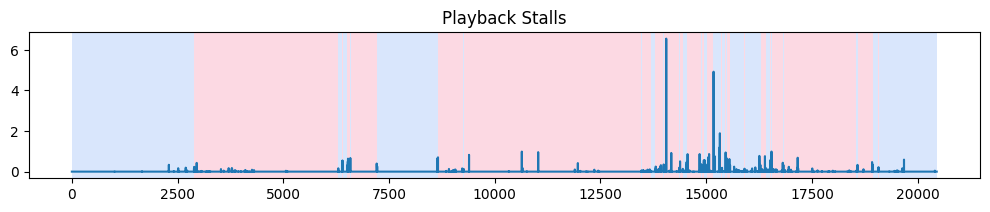

Change points for Startup Error (Count): [10, 15, 2320, 2325, 2580, 2590, 2605, 2615, 2620, 2625, 2740, 2750, 2780, 2785, 3410, 3415, 3420, 3430, 3480, 3490, 3495, 3500, 3505, 3510, 3530, 3535, 3540, 3545, 3560, 3565, 3780, 3790, 3795, 3800, 4080, 4085, 4195, 4205, 4245, 4250, 4265, 4270, 4280, 4285, 4290, 4720, 4725, 4795, 4815, 5425, 5445, 5620, 5645, 5985, 6005, 6365, 6385, 6550, 6555, 6560, 6565, 6570, 6575, 6600, 6620, 6695, 6700, 6730, 6735, 6740, 6745, 6995, 7010, 7015, 7025, 7030, 7035, 7240, 7265, 7435, 7450, 7465, 7485, 7530, 7540, 7545, 7550, 7615, 7630, 7810, 7830, 7935, 7945, 7950, 7955, 7965, 7970, 7980, 7990, 8000, 8005, 8055, 8080, 8115, 8140, 8215, 8235, 8450, 8460, 8465, 8470, 8550, 8565, 8720, 8725, 8730, 8735, 8860, 8885, 9355, 9360, 9365, 9385, 9390, 9395, 9880, 9885, 9890, 13385, 13390, 13755, 13760, 13815, 13825, 13835, 13845, 13850, 13855, 13860, 13865, 13925, 13930, 13935, 13940, 13965, 13970, 13985, 13990, 13995, 14000, 14005, 14010, 14025, 14030, 14070, 14075

<Figure size 1000x600 with 0 Axes>

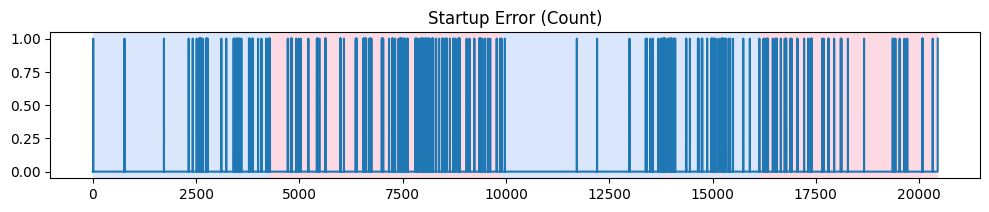

Change points for Latency: [100, 185, 190, 230, 395, 550, 555, 585, 645, 650, 805, 810, 845, 850, 910, 960, 980, 1070, 1480, 1605, 1610, 1615, 1655, 1660, 1685, 1690, 1725, 1730, 1755, 1760, 1795, 1800, 1840, 1845, 1855, 1885, 1890, 1905, 1910, 1930, 1935, 1955, 1960, 2070, 2075, 2080, 2095, 2100, 2120, 2160, 2165, 2170, 2265, 2445, 4775, 4830, 4845, 4850, 5235, 5280, 5290, 5295, 5540, 5775, 5800, 5805, 5830, 5835, 6820, 7155, 7535, 7600, 7700, 7725, 7950, 8055, 8075, 8915, 8955, 9020, 9140, 9365, 9390, 9480, 9490, 9750, 9840, 9895, 10155, 10395, 10515, 10635, 10640, 10645, 10820, 11680, 11685, 11735, 11845, 12070, 12225, 12415, 12420, 12425, 12750, 13125, 13545, 13550, 13555, 13880, 13920, 13945, 13950, 13965, 13985, 14110, 14165, 14180, 14185, 14190, 14345, 14350, 14365, 14375, 14385, 14390, 14400, 14405, 14450, 14580, 14815, 14820, 14840, 15195, 15215, 15220, 15225, 15230, 15240, 15245, 15320, 15335, 15375, 15380, 15430, 15435, 15580, 15710, 15715, 15730, 15775, 15825, 15910, 15930,

<Figure size 1000x600 with 0 Axes>

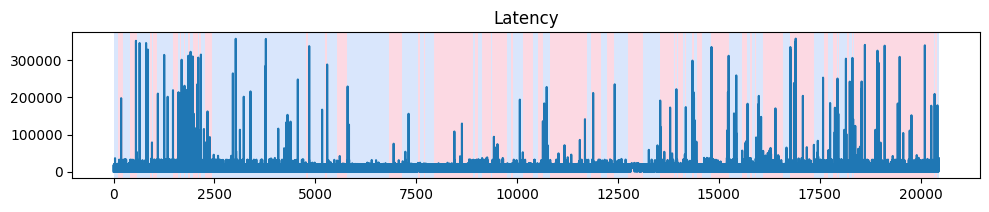

Change points for Crash Status: [10, 15, 2320, 2325, 2560, 2565, 2575, 2580, 2590, 2605, 2615, 2620, 2625, 2740, 2750, 2780, 2785, 3405, 3410, 3415, 3420, 3430, 3480, 3490, 3495, 3500, 3505, 3510, 3530, 3535, 3540, 3545, 3560, 3565, 3780, 3870, 3875, 4080, 4085, 4195, 4205, 4210, 4245, 4250, 4265, 4270, 4280, 4285, 4290, 4720, 4725, 4795, 4815, 4855, 4860, 5425, 5445, 5620, 5645, 5985, 6005, 6270, 6280, 6365, 6385, 6555, 6560, 6565, 6570, 6575, 6600, 6620, 6695, 6700, 6730, 6735, 6740, 6745, 6995, 7010, 7015, 7025, 7030, 7035, 7240, 7265, 7435, 7450, 7465, 7485, 7530, 7540, 7615, 7630, 7810, 7830, 7935, 7945, 7950, 7955, 7965, 7970, 7980, 7990, 8000, 8005, 8055, 8080, 8115, 8140, 8215, 8235, 8450, 8460, 8465, 8470, 8550, 8565, 8720, 8725, 8730, 8735, 8860, 8885, 9215, 9220, 9355, 9360, 9365, 9385, 9390, 9395, 9620, 9625, 9640, 9650, 9880, 9885, 9890, 13385, 13390, 13985, 13990, 13995, 14000, 14005, 14010, 14025, 14030, 14055, 14060, 14070, 14075, 14080, 14085, 14095, 14100, 14970, 1497

<Figure size 1000x600 with 0 Axes>

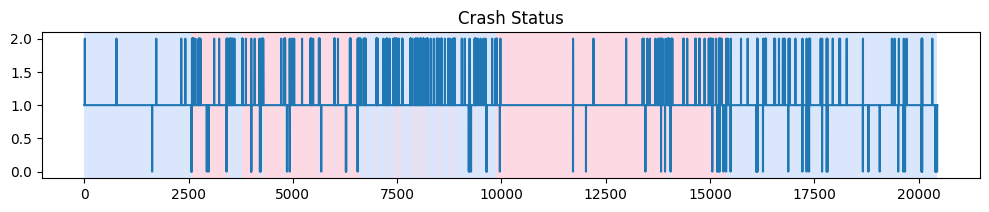

Change points for End of Playback Status: [10, 15, 2310, 2320, 2325, 2560, 2580, 2590, 2605, 2625, 2690, 2695, 2705, 2710, 2740, 2750, 2780, 2785, 3405, 3430, 3480, 3490, 3540, 3545, 3560, 3565, 3595, 3600, 3775, 3780, 3790, 3795, 3800, 3995, 4000, 4005, 4080, 4085, 4195, 4210, 4280, 4285, 4290, 4720, 4725, 4795, 4815, 5060, 5065, 5425, 5445, 6520, 6525, 6550, 6575, 6600, 6620, 6695, 6700, 6740, 6745, 6995, 7010, 7015, 7035, 7240, 7265, 7400, 7405, 7435, 7450, 7465, 7485, 7615, 7630, 7810, 7830, 7935, 7945, 7980, 7990, 8000, 8005, 8055, 8080, 8115, 8140, 8215, 8235, 8450, 8460, 8465, 8470, 8550, 8565, 8860, 8885, 9215, 9220, 9235, 9240, 9355, 9360, 9365, 9385, 9390, 9395, 9430, 9435, 9640, 9650, 9855, 9860, 9880, 9885, 9890, 9960, 9965, 9975, 9980, 13385, 13390, 13755, 13760, 13815, 13830, 13835, 13840, 13845, 13860, 13865, 13985, 13995, 14000, 14005, 14030, 14055, 14060, 14095, 14100, 14355, 14365, 14970, 14985, 15020, 15030, 15050, 15060, 15070, 15080, 15145, 15150, 15155, 15160, 152

<Figure size 1000x600 with 0 Axes>

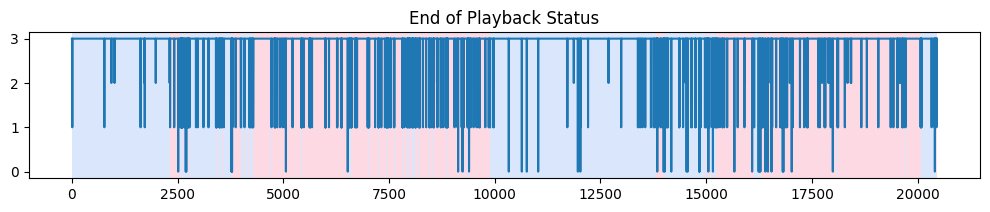

Change points for User_ID_N: [185, 225, 260, 400, 545, 625, 645, 665, 1000, 1820, 1845, 1940, 1985, 2010, 2065, 2120, 2280, 2410, 2790, 2825, 2905, 3130, 3185, 3260, 3510, 3530, 3585, 3590, 3655, 3675, 3755, 3805, 3865, 3965, 4030, 4075, 4160, 4185, 4200, 4215, 4230, 4245, 4270, 4280, 4340, 4405, 4465, 4470, 4480, 4500, 4565, 4645, 5120, 5150, 5210, 5245, 5270, 5295, 5325, 5415, 5510, 5535, 5615, 5650, 6575, 6695, 6820, 6915, 6935, 7100, 7105, 7145, 7205, 7325, 7355, 7385, 7430, 7480, 7630, 7715, 7950, 8010, 8325, 8330, 8335, 8355, 8380, 8395, 8435, 8615, 8650, 8680, 8700, 8735, 8755, 8860, 8885, 8910, 8930, 9460, 9480, 9495, 9575, 9605, 9675, 9710, 9765, 9790, 9835, 9860, 9950, 9995, 10110, 10945, 10965, 11035, 11180, 11270, 11340, 11345, 11410, 11505, 11530, 11605, 11650, 12195, 12410, 12585, 12630, 12695, 12710, 12750, 12880, 13480, 13510, 13610, 13645, 13705, 13750, 13755, 13785, 13880, 13920, 14170, 14240, 14355, 14450, 14490, 14625, 14690, 14725, 14780, 15355, 15440, 15525, 15555

<Figure size 1000x600 with 0 Axes>

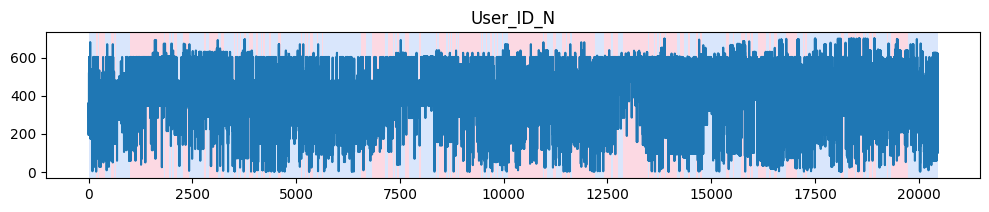

Change points for Title_N: [1035, 1470, 1500, 1525, 1535, 1545, 1700, 1915, 1925, 2885, 3420, 3495, 3510, 3530, 3545, 3615, 3665, 3705, 4340, 4345, 4395, 4605, 4620, 5290, 5300, 5310, 5380, 5965, 7240, 7265, 7285, 7315, 7320, 7600, 7665, 7670, 7785, 7795, 7800, 7810, 7830, 7835, 7875, 7935, 7950, 8020, 8055, 8075, 8085, 8110, 8115, 8120, 8155, 8210, 8215, 8235, 8275, 8355, 8445, 8475, 8490, 8955, 9110, 9185, 9200, 9210, 9315, 9365, 9395, 9455, 9475, 9635, 9655, 9675, 9690, 9765, 9815, 9820, 9825, 10755, 12725, 12730, 12880, 13030, 13045, 13060, 13120, 13165, 13185, 13190, 13205, 13235, 13300, 13390, 13405, 13430, 13445, 13525, 13540, 13565, 13595, 13645, 13690, 13760, 13785, 13820, 13825, 13830, 13980, 14015, 14030, 14075, 14110, 14160, 14180, 14225, 14245, 14325, 14345, 14360, 14495, 14540, 14575, 14610, 14645, 14650, 14740, 14770, 14775, 14855, 15055, 15095, 15160, 15170, 15190, 15195, 15205, 15220, 15275, 15280, 15410, 15435, 15465, 15475, 15500, 15600, 15745, 15770, 15875, 15885, 1

<Figure size 1000x600 with 0 Axes>

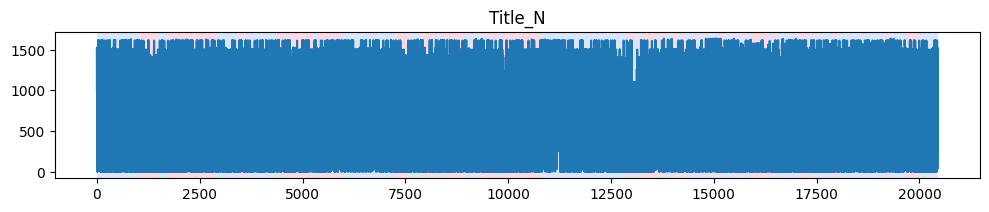

Change points for Device_Vendor_N: [570, 745, 780, 1990, 2010, 2280, 2295, 2390, 2410, 2455, 2555, 2565, 2570, 2575, 2740, 2775, 2790, 2870, 3005, 3130, 3190, 3365, 3390, 3410, 3435, 3460, 3480, 3510, 3530, 3545, 3565, 3570, 3590, 3610, 4245, 4255, 4265, 4280, 4330, 4755, 4780, 4895, 4940, 5215, 5475, 5510, 5570, 5595, 5955, 5970, 5985, 6035, 6060, 6115, 6120, 6125, 6220, 6245, 6270, 6275, 6295, 6395, 6480, 6485, 6495, 6525, 6570, 6725, 7290, 7305, 7325, 8770, 8885, 8975, 8980, 9020, 9040, 9095, 9185, 9195, 9215, 9230, 9245, 9255, 9270, 10420, 10450, 10540, 10560, 10635, 10645, 10655, 10730, 10750, 10765, 11005, 11050, 11380, 11605, 11610, 11715, 11755, 11870, 12055, 12185, 12225, 12320, 12325, 12440, 12455, 13445, 13450, 13530, 13615, 13680, 13700, 13750, 13775, 13785, 13800, 13820, 13825, 13840, 13860, 13870, 13880, 13920, 13950, 13965, 13985, 13995, 14005, 14015, 14065, 14100, 14105, 14215, 14245, 14295, 14405, 14730, 14835, 14860, 14885, 14895, 14920, 15005, 15040, 15090, 15095, 15

<Figure size 1000x600 with 0 Axes>

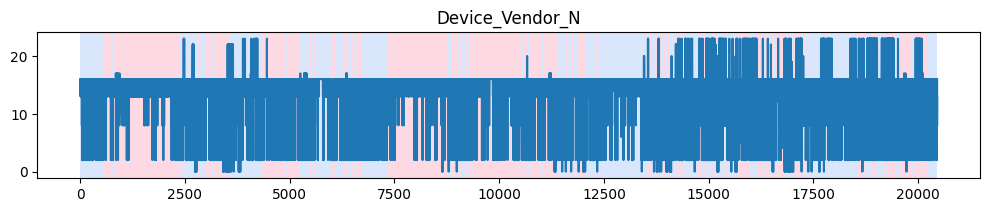

Change points for Device_Model_N: [265, 315, 550, 570, 900, 1715, 1840, 1845, 1990, 2010, 2280, 2300, 2400, 2445, 2450, 2455, 2555, 2565, 2570, 2575, 2640, 2670, 2715, 2735, 2780, 2830, 3365, 3390, 3405, 3435, 3460, 3480, 3575, 4070, 4120, 4250, 4285, 4330, 4620, 4665, 5280, 5290, 5320, 5340, 5360, 5475, 5510, 5545, 5570, 5580, 5590, 5970, 5985, 6025, 6035, 6060, 6125, 6200, 6220, 6245, 6360, 6480, 6495, 6525, 6590, 6665, 6690, 6715, 7290, 7320, 8735, 8765, 8975, 9270, 10425, 10465, 10540, 10560, 10740, 10745, 11720, 11750, 11960, 11980, 12055, 12185, 12285, 12355, 12440, 12455, 13085, 13485, 13490, 13530, 13620, 13845, 13865, 13875, 13880, 13920, 13925, 13950, 13965, 14015, 14065, 14070, 14105, 14165, 14180, 14215, 14245, 14275, 14290, 14355, 14410, 14495, 14525, 14540, 14575, 14590, 14640, 14645, 14660, 14670, 14675, 14725, 14765, 14795, 14810, 14835, 14865, 14885, 14895, 14930, 15010, 15150, 15285, 15360, 15455, 15465, 15480, 15500, 15530, 15540, 15565, 15575, 15820, 15860, 15890, 1

<Figure size 1000x600 with 0 Axes>

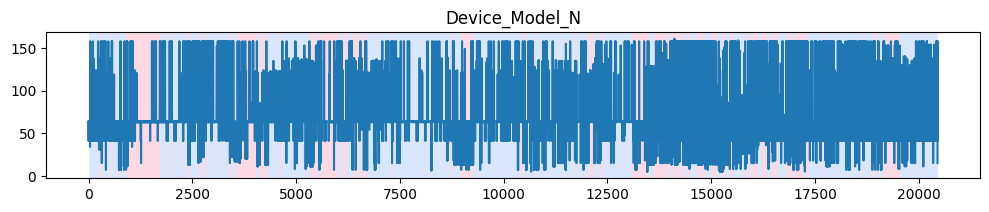

Change points for Content_TV_Show_N: [60, 75, 1040, 1045, 1055, 1780, 1840, 1845, 1990, 2010, 2265, 2300, 2405, 2420, 2740, 2775, 2780, 2885, 2980, 3130, 3410, 3435, 3460, 3480, 3495, 3595, 3605, 3705, 3715, 3720, 3755, 3765, 3780, 3785, 3805, 4000, 4080, 4120, 4290, 4330, 4895, 4920, 4930, 4940, 5060, 5085, 5110, 5140, 5220, 5235, 5320, 5380, 5570, 5580, 5910, 5915, 5920, 6025, 6035, 6060, 6115, 6120, 6650, 6710, 6715, 7290, 7340, 8575, 8615, 8635, 8750, 8810, 8825, 8845, 8970, 9020, 9040, 9095, 9160, 9165, 9180, 9200, 9210, 9280, 10330, 10335, 10730, 10765, 12175, 12230, 12445, 12455, 13470, 13475, 13610, 13770, 13785, 13805, 13820, 13825, 13840, 13850, 13920, 13950, 13955, 13965, 14165, 14180, 14840, 14875, 14905, 14930, 15095, 15340, 15380, 15385, 15395, 15420, 15520, 15535, 15545, 15565, 15620, 15625, 15680, 15700, 15715, 15730, 15750, 15785, 15890, 15905, 15920, 15935, 16100, 16275, 16305, 16355, 16385, 16420, 16440, 16450, 16500, 16505, 16525, 16530, 16555, 16580, 17140, 17175, 

<Figure size 1000x600 with 0 Axes>

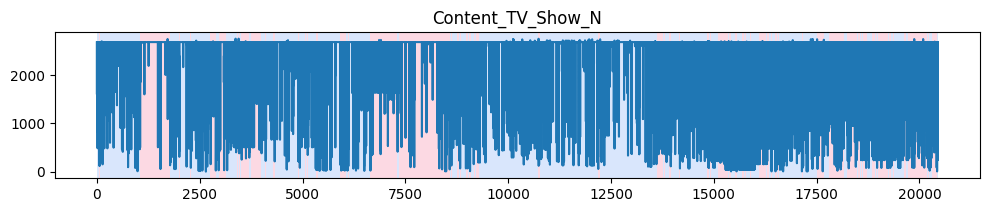

Change points for Country_N: [45, 50, 250, 290, 300, 310, 550, 560, 2180, 3085, 3095, 3610, 4680, 4765, 4785, 4895, 4910, 4930, 4940, 5060, 5065, 5070, 5075, 5080, 5135, 5220, 5235, 5320, 5335, 5340, 5355, 5365, 5370, 5380, 5400, 5475, 5480, 5485, 5490, 5510, 5545, 5970, 5980, 5985, 6040, 6050, 6090, 6095, 6115, 6120, 6125, 6200, 6210, 6220, 6225, 6235, 6240, 6245, 6305, 6325, 6330, 6335, 6355, 6360, 6480, 6485, 6495, 6525, 7140, 7145, 7150, 7270, 7275, 7295, 7300, 7305, 7325, 9855, 9860, 10425, 10430, 10440, 10465, 10645, 10655, 10745, 10765, 11380, 11385, 11445, 11450, 11455, 11475, 11485, 11540, 11565, 11735, 11740, 11750, 11755, 11870, 11875, 11975, 12400, 12465, 12560, 13445, 13490, 13625, 13680, 13685, 13695, 13840, 13875, 13880, 13920, 13925, 13950, 13965, 14015, 14025, 14065, 14070, 14385, 14560, 14565, 14595, 14715, 15145, 15160, 15170, 15175, 15465, 15480, 15725, 15775, 15850, 15965, 15995, 16040, 16055, 16070, 16120, 16165, 16230, 16340, 16405, 16785, 16800, 17225, 17680, 17

<Figure size 1000x600 with 0 Axes>

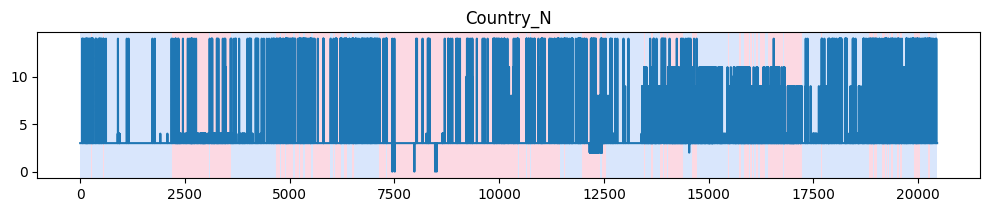

Change points for City_N: [45, 50, 75, 315, 330, 380, 670, 720, 725, 780, 1000, 1600, 1910, 1945, 1960, 1965, 2015, 2065, 2125, 2295, 2425, 2450, 2470, 2485, 2530, 2565, 2660, 2680, 2695, 2730, 2835, 3145, 3260, 3280, 3300, 3370, 3405, 3435, 3475, 3510, 3605, 3620, 3905, 4415, 4450, 4500, 4560, 4665, 4775, 4785, 4835, 4920, 4925, 4985, 5005, 5040, 5095, 5120, 5140, 5420, 5475, 5515, 5570, 5640, 5790, 5830, 5850, 5895, 5920, 5985, 6005, 6015, 6220, 6245, 6345, 6360, 6385, 6480, 6585, 6620, 6655, 6735, 6815, 6885, 6920, 6945, 7015, 7035, 7645, 7710, 7835, 7855, 8305, 8355, 8375, 8410, 8470, 8525, 8540, 8565, 8650, 8710, 8755, 8805, 8825, 8850, 9095, 9145, 9185, 9195, 9285, 9395, 9745, 10350, 10420, 10465, 10495, 10860, 10885, 11030, 11125, 11145, 11180, 11280, 11305, 11310, 11325, 11405, 11450, 11505, 11525, 11535, 11540, 11585, 11605, 11690, 11705, 11725, 11750, 11795, 11830, 11870, 12355, 12410, 12455, 12590, 12595, 12630, 12710, 12750, 12880, 13030, 13755, 13875, 13880, 13920, 13950, 

<Figure size 1000x600 with 0 Axes>

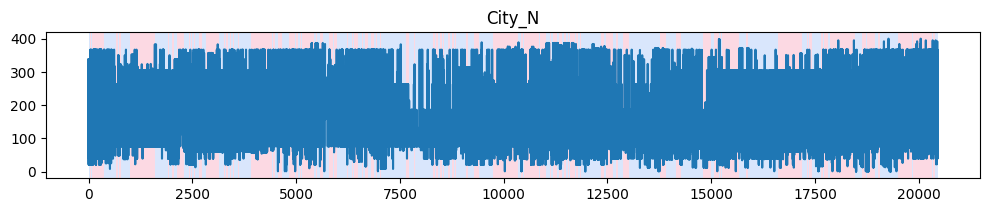

Change points for Region_N: [45, 50, 250, 290, 300, 310, 370, 375, 460, 480, 550, 560, 2180, 4565, 4765, 4785, 4895, 4910, 4930, 4940, 5060, 5065, 5070, 5075, 5080, 5120, 5135, 5220, 5235, 5320, 5335, 5340, 5355, 5365, 5370, 5380, 5400, 5475, 5480, 5485, 5490, 5510, 5545, 5590, 5595, 5970, 5980, 5985, 6040, 6050, 6090, 6095, 6115, 6120, 6125, 6200, 6210, 6220, 6225, 6235, 6240, 6245, 6305, 6325, 6330, 6335, 6355, 6360, 6480, 6485, 6495, 6500, 6525, 6570, 6590, 6710, 7095, 7100, 7105, 7110, 7140, 7145, 7150, 7270, 7275, 7295, 7300, 7305, 7325, 9855, 9865, 10115, 10130, 10425, 10435, 10440, 10465, 10645, 10655, 10665, 10745, 10755, 10760, 10765, 11005, 11040, 11095, 11380, 11385, 11395, 11400, 11420, 11425, 11450, 11455, 11540, 11555, 11560, 11565, 11640, 11720, 11730, 11735, 11740, 11750, 11755, 11870, 11875, 11885, 11905, 11940, 11945, 11965, 11975, 12185, 12190, 12205, 12215, 12235, 12240, 12310, 12440, 12455, 13680, 13685, 13695, 13880, 13920, 13925, 13950, 13965, 14715, 17695, 17700

<Figure size 1000x600 with 0 Axes>

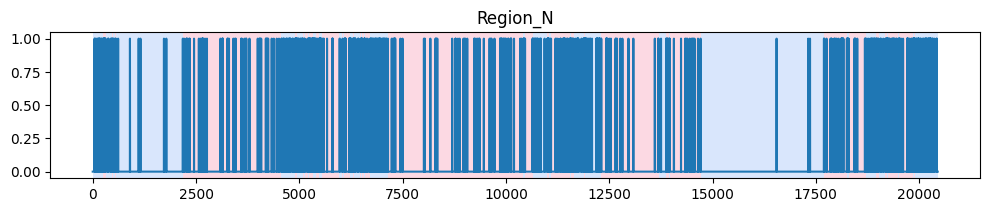

In [54]:
import ruptures as rpt

for column in df.columns:
    # Get the data for the current column
    actual_data = test_data[column].values
    forecast_data = dfv[column].values

    # Define the model
    model = "l2"  # "l1", "rbf", "linear", "normal", "ar"

    # Define the window width
    width = 7

    # Perform window-based change point detection for actual data
    # algo_actual = rpt.Window(width=width, model=model).fit(actual_data)
    # breakpoints_actual = algo_actual.predict(n_bkps=1)

    # Perform window-based change point detection for forecast data
    algo_forecast = rpt.Binseg(model=model).fit(forecast_data)
    breakpoints_forecast = algo_forecast.predict(n_bkps=200)

    # Print the change points
    # print(f"Change points for {column} (Actual): {breakpoints_actual}")
    print(f"Change points for {column}: {breakpoints_forecast}")

    # Plotting the signal and change points for actual data
    # plt.figure(figsize=(10,6))
    # rpt.display(actual_data, breakpoints_actual)
    # plt.title(f'{column} - Actual data')
    # plt.show()

    # Plotting the signal and change points for forecast data
    plt.figure(figsize=(10,6))
    rpt.display(actual_data, breakpoints_forecast)
    plt.title(f'{column}')
    plt.show()


From the graph, it can be seen there are change-point detected in every features. This method shows good result for detecting sudden change-point but still cannot detect every change appear on dataset.

It also shows that Playtime have the most change point detected other than any features in the given dataset which we know it cause Playtime features is the main features which causes irregular fluctuation in given dataset.

**5.1.2 windown Based**

Window-based change point detection is used to perform fast signal segmentation, we use window-based algorithm implemented in ruptures library. The algorithm uses two windows which slide along the time series data. The statistical properties of the signals within each window are compared with a discrepancy measure. If the sliding windows both fall into a segment, their statistical properties are similar and the discrepancy between the first window and the second window is low. If the sliding windows fall into two dissimilar segments, the discrepancy is significantly higher, suggesting that the boundary between windows is a change point. A sequential peak search is performed on the discrepancy curve in order to detect change points.

The benefits of window-based segmentation includes low complexity, also it can extend any single change point detection method to detect multiple changes points and that it can work whether the number of regimes is known beforehand or not.


We detecting changes on test data and forecast data to see the performance of the model

Change points for Playtime: [15, 25, 80, 130, 235, 305, 320, 475, 510, 575, 780, 850, 900, 1110, 1125, 1155, 1185, 1265, 1310, 1370, 1420, 1505, 1530, 1610, 1670, 1720, 1870, 2315, 2445, 2495, 2580, 2665, 2900, 2945, 3045, 3110, 3150, 3230, 3245, 3695, 3955, 4030, 4215, 4225, 4285, 4300, 4460, 4670, 4945, 5135, 5310, 5680, 5785, 5915, 5970, 6025, 6105, 6150, 6190, 6275, 6295, 6345, 6395, 6505, 6520, 6665, 6770, 6790, 7040, 7075, 7320, 7505, 7520, 7590, 7670, 7785, 7855, 7975, 8005, 8055, 8165, 8795, 8975, 9210, 9235, 9410, 9495, 9695, 9730, 9745, 9860, 9915, 9925, 9985, 10025, 10120, 10235, 10265, 10290, 10365, 10435, 10650, 10675, 10940, 10975, 11090, 11255, 11325, 11445, 11605, 11680, 11860, 11870, 11905, 11930, 11945, 12010, 12025, 12035, 12055, 12085, 12095, 12170, 12275, 12315, 12435, 12480, 12585, 12600, 12670, 12695, 12770, 12810, 12885, 12940, 12965, 12990, 13150, 13390, 13470, 13605, 13880, 13980, 14810, 15005, 15145, 15385, 15680, 15730, 15755, 15815, 16595, 16625, 16790, 168

<Figure size 1000x600 with 0 Axes>

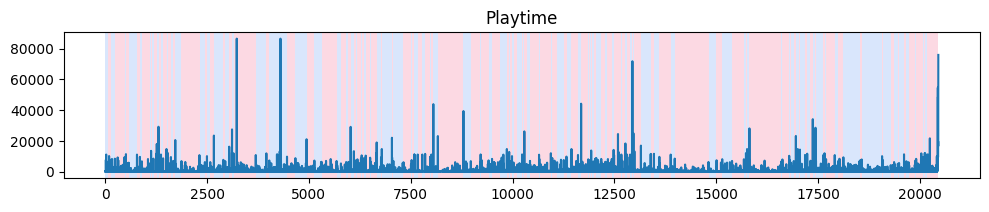

Change points for Interruptions: [935, 1010, 1985, 2640, 2700, 2980, 3865, 4145, 4180, 4210, 4275, 4405, 4455, 4985, 5080, 5915, 6105, 6290, 6305, 6340, 6360, 6520, 6530, 6550, 6585, 6985, 7165, 7295, 7335, 8055, 8115, 8165, 8580, 8625, 8985, 9005, 9015, 9045, 9060, 9080, 9135, 9165, 9210, 9245, 9265, 9310, 9415, 9970, 10140, 10300, 10600, 10640, 10700, 10760, 10975, 11015, 11030, 11180, 11360, 11870, 11895, 11925, 11965, 12025, 12165, 12200, 12270, 12280, 12350, 12475, 12885, 12940, 13395, 13475, 13545, 13575, 13595, 13610, 13640, 13660, 13680, 13700, 13745, 13830, 13845, 13935, 14020, 14055, 14075, 14150, 14190, 14470, 14485, 14525, 14540, 14555, 14605, 14710, 14830, 14860, 14890, 14900, 14925, 14945, 14960, 15005, 15030, 15045, 15070, 15095, 15110, 15160, 15205, 15235, 15275, 15325, 15345, 15390, 15450, 15460, 15470, 15535, 15555, 15565, 15590, 15665, 15680, 15695, 15715, 15735, 15750, 15775, 15785, 15855, 15865, 15875, 15940, 15965, 16065, 16085, 16150, 16200, 16215, 16240, 16330, 

<Figure size 1000x600 with 0 Axes>

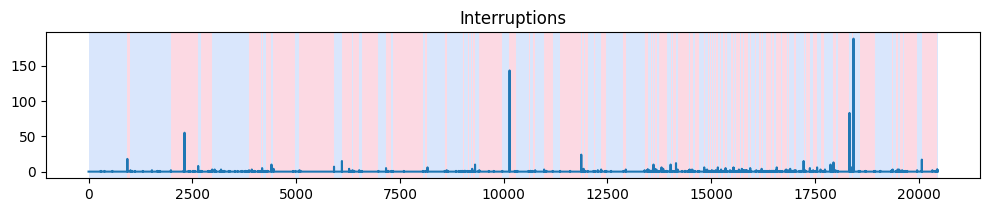

Change points for Join Time: [725, 750, 960, 985, 1265, 1395, 1550, 1790, 1860, 2560, 2625, 2670, 2830, 2880, 2915, 2930, 2995, 3040, 3100, 3155, 3170, 3190, 3375, 3410, 3445, 3455, 3650, 3780, 3790, 3800, 3840, 3855, 3880, 3920, 3955, 4000, 4145, 4300, 4385, 4455, 4560, 4675, 4765, 5090, 5100, 5380, 5510, 5595, 5915, 6550, 6895, 6970, 7045, 8385, 8510, 9255, 9645, 9655, 10055, 10125, 10220, 10285, 10540, 10760, 10790, 10940, 11040, 11065, 11390, 11650, 11965, 12160, 12420, 12440, 12485, 12510, 12575, 12710, 12840, 13540, 13560, 13600, 13615, 13640, 13655, 13680, 13730, 13770, 13785, 13805, 13825, 13930, 13975, 14005, 14015, 14115, 14150, 14175, 14235, 14255, 14480, 14500, 14555, 14690, 14825, 14835, 14860, 14920, 15015, 15045, 15060, 15175, 15210, 15295, 15325, 15345, 15400, 15440, 15450, 15515, 15525, 15535, 15580, 15600, 15645, 15655, 15685, 15715, 15730, 15870, 15900, 15925, 16020, 16035, 16295, 16305, 16320, 16410, 16425, 16460, 16475, 16505, 16520, 16530, 16560, 16580, 16590, 166

<Figure size 1000x600 with 0 Axes>

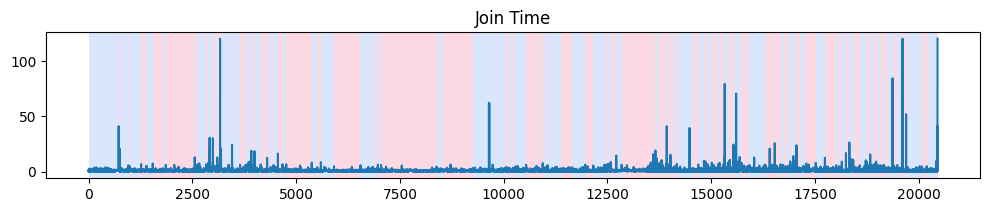

Change points for Buffer Ratio: [935, 1010, 1660, 2295, 2410, 2515, 2530, 2695, 2730, 2895, 2940, 2980, 3070, 3190, 3240, 3275, 3525, 3590, 3710, 3780, 3790, 3840, 3865, 3940, 3995, 4085, 4105, 4145, 4180, 4305, 5060, 5080, 6300, 6400, 6520, 6530, 6585, 7210, 7220, 8645, 8660, 8855, 8915, 8985, 9005, 9015, 9050, 9060, 9070, 9080, 9265, 9395, 10140, 10330, 10640, 10655, 10760, 11030, 11895, 11965, 12025, 12165, 12355, 12445, 13470, 13480, 13515, 13575, 13615, 13640, 13665, 13680, 13700, 13800, 13830, 13845, 13875, 13935, 13995, 14005, 14015, 14055, 14130, 14140, 14150, 14175, 14190, 14300, 14365, 14445, 14485, 14495, 14535, 14545, 14560, 14605, 14830, 14845, 14870, 14885, 14905, 14925, 14945, 14955, 14965, 14995, 15005, 15030, 15050, 15060, 15070, 15090, 15110, 15130, 15160, 15205, 15320, 15360, 15375, 15390, 15450, 15460, 15470, 15490, 15550, 15565, 15660, 15695, 15715, 15750, 15765, 15785, 15840, 15855, 15865, 15875, 15905, 15940, 15955, 15965, 16065, 16085, 16160, 16215, 16235, 16260

<Figure size 1000x600 with 0 Axes>

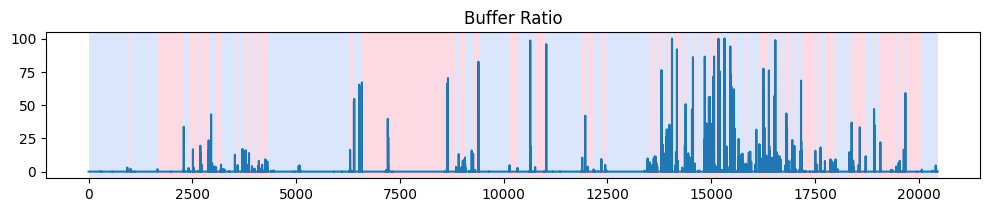

Change points for Connection Type: [40, 225, 255, 545, 600, 685, 1020, 1070, 1275, 1625, 2040, 2170, 2275, 2420, 2435, 2715, 2930, 3400, 3605, 3720, 3855, 3925, 3965, 4095, 4140, 4270, 4280, 4290, 4510, 4585, 4595, 4795, 5345, 5580, 5620, 6025, 6065, 6095, 6135, 6270, 6325, 6400, 6495, 6530, 6550, 6700, 6715, 6820, 6895, 7070, 7100, 7400, 7620, 7805, 7905, 7990, 8165, 8195, 8215, 8305, 8340, 8400, 8475, 8505, 8515, 8550, 8650, 8710, 8855, 8885, 8905, 8975, 9010, 9045, 9120, 9225, 9255, 9500, 9675, 9975, 10340, 10425, 10810, 10840, 10860, 10965, 10975, 11035, 11050, 11350, 11500, 11690, 12025, 12045, 12095, 12120, 12150, 12180, 12310, 12325, 12410, 12490, 12650, 12690, 13335, 13360, 13395, 13445, 13525, 13545, 13560, 13575, 13595, 13605, 13615, 13940, 13970, 14130, 14175, 14275, 14350, 14375, 14680, 14725, 14780, 15080, 15105, 15150, 15325, 15360, 15415, 15430, 15480, 15490, 15900, 16090, 16170, 16535, 16550, 16665, 16770, 16790, 16860, 16990, 17020, 17230, 17250, 17330, 17480, 17515, 1

<Figure size 1000x600 with 0 Axes>

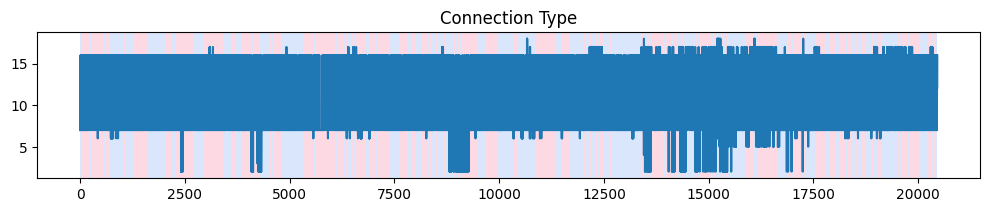

Change points for Device: [45, 80, 135, 275, 300, 370, 550, 900, 1725, 1780, 1845, 2420, 2435, 2455, 2570, 2640, 2655, 2665, 3140, 3150, 3265, 3590, 3705, 4280, 4290, 4770, 5070, 5080, 5220, 5320, 5370, 5480, 5510, 5570, 5595, 5915, 5970, 6095, 6115, 6220, 6245, 6275, 6330, 6360, 6480, 6525, 6820, 7025, 7100, 7145, 7275, 7300, 7450, 8340, 8470, 8785, 8810, 8825, 8880, 9045, 9095, 9225, 9630, 9880, 9965, 9985, 10060, 10335, 10435, 10445, 10645, 10655, 10765, 11015, 11380, 11420, 11455, 11485, 11560, 11610, 11735, 11875, 11885, 11900, 11940, 11970, 12195, 12205, 12235, 12275, 12310, 12320, 12350, 12440, 12455, 12655, 13445, 13480, 13540, 13570, 13595, 13660, 13680, 13690, 13700, 13755, 13805, 13870, 13950, 13965, 14150, 14175, 14450, 14500, 14540, 14570, 14710, 14760, 14850, 14945, 15025, 15105, 15125, 15140, 15170, 15300, 15320, 15415, 15430, 15455, 15480, 15535, 15675, 15690, 15750, 15805, 15875, 15905, 15915, 15995, 16005, 16040, 16115, 16195, 16280, 16350, 16395, 16410, 16450, 16525,

<Figure size 1000x600 with 0 Axes>

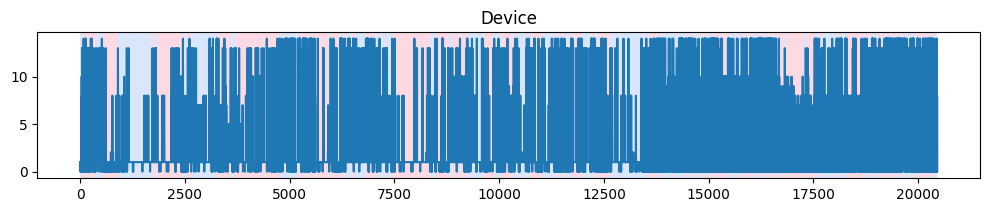

Change points for Device Type: [175, 565, 840, 850, 875, 895, 935, 1845, 2410, 2420, 2435, 2455, 2510, 2560, 2645, 2770, 2905, 2960, 2995, 3155, 3230, 3325, 3340, 3375, 3390, 3410, 3435, 3445, 3455, 3570, 4070, 4095, 4280, 4290, 5255, 5290, 5345, 5375, 5395, 5540, 5570, 5600, 5915, 5985, 6060, 6070, 6085, 6095, 6105, 6135, 6350, 6665, 6680, 6690, 7295, 8325, 8625, 8635, 8735, 8810, 8825, 9045, 9065, 9095, 9170, 9225, 9255, 9545, 9995, 10140, 10235, 10655, 10935, 10960, 11030, 11195, 11205, 11225, 11535, 12045, 12265, 12585, 13530, 13545, 13560, 13575, 13605, 13765, 14070, 14080, 14105, 14115, 14175, 14215, 14245, 14275, 14285, 14330, 14350, 14360, 14390, 14430, 14445, 14475, 14490, 14500, 14625, 14645, 14670, 14680, 14695, 14715, 14725, 14860, 14895, 14925, 14965, 14985, 15000, 15015, 15055, 15080, 15120, 15175, 15235, 15275, 15370, 15390, 15415, 15430, 15465, 15475, 15490, 15515, 15535, 15565, 15575, 15640, 15665, 15675, 15790, 15905, 15925, 15965, 15975, 16025, 16045, 16080, 16100, 1

<Figure size 1000x600 with 0 Axes>

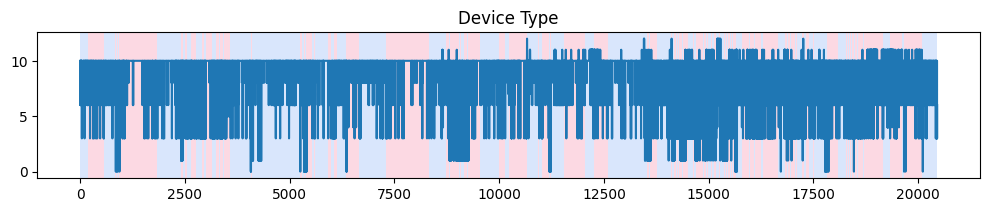

Change points for Browser: [45, 80, 275, 370, 420, 550, 745, 755, 770, 855, 900, 1845, 2655, 3265, 4970, 5070, 5080, 5220, 5370, 5480, 5510, 5565, 5595, 5970, 6095, 6115, 6220, 6245, 6275, 6330, 6435, 6480, 6525, 6635, 6700, 6710, 6820, 6895, 6910, 7025, 7100, 7145, 7275, 7300, 7450, 8260, 8340, 8470, 8785, 8880, 8975, 9105, 9165, 9435, 9630, 9965, 9985, 10060, 10235, 10335, 10345, 10435, 10445, 10535, 10560, 10645, 10655, 10730, 10745, 10765, 10810, 10835, 10975, 11005, 11015, 11330, 11380, 11420, 11455, 11485, 11495, 11560, 11610, 11715, 11740, 11875, 11895, 11925, 11940, 12005, 12195, 12205, 12235, 12280, 12320, 12350, 12440, 12455, 12655, 13175, 13190, 13200, 13445, 13665, 13690, 13805, 13950, 13965, 14040, 14150, 14490, 14555, 14840, 14855, 15025, 15055, 15105, 15125, 15140, 15170, 15200, 15225, 15285, 15315, 15465, 15480, 15605, 15660, 15770, 15805, 15875, 15915, 16005, 16100, 16115, 16165, 16180, 16195, 16320, 16340, 16350, 16380, 16395, 16410, 16445, 16470, 16510, 16550, 16600,

<Figure size 1000x600 with 0 Axes>

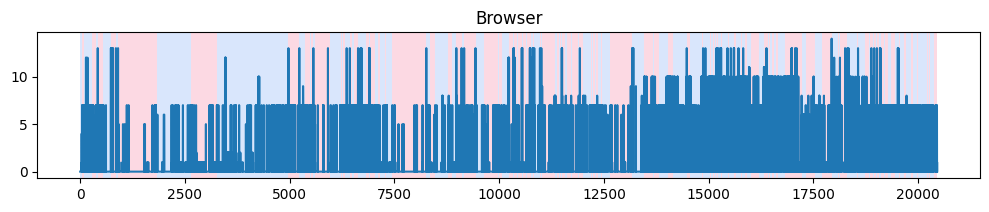

Change points for OS: [45, 80, 275, 300, 370, 550, 770, 900, 1725, 1780, 1845, 2420, 2455, 2570, 2640, 2655, 2665, 3150, 3265, 3590, 3705, 5070, 5080, 5220, 5320, 5370, 5480, 5510, 5540, 5570, 5595, 5970, 6095, 6115, 6220, 6245, 6275, 6330, 6480, 6525, 6665, 6680, 6700, 6710, 6820, 6895, 7025, 7100, 7145, 7275, 7300, 7450, 8325, 8340, 8470, 8785, 8880, 8975, 9165, 9630, 9880, 9965, 9985, 10060, 10335, 10345, 10435, 10445, 10645, 10655, 10730, 10765, 11015, 11380, 11420, 11455, 11485, 11560, 11610, 11875, 11885, 11900, 11925, 11940, 11970, 12195, 12205, 12310, 12350, 12440, 12455, 12655, 13445, 13485, 13560, 13595, 13755, 13770, 13805, 13950, 13965, 14070, 14080, 14115, 14240, 14275, 14430, 14450, 14480, 14500, 14640, 14670, 14710, 14735, 14760, 14850, 14920, 14945, 15025, 15105, 15125, 15140, 15200, 15285, 15300, 15370, 15415, 15430, 15480, 15535, 15575, 15640, 15675, 15805, 15905, 15925, 15975, 15995, 16005, 16045, 16115, 16195, 16240, 16350, 16395, 16450, 16525, 16550, 16590, 16815, 

<Figure size 1000x600 with 0 Axes>

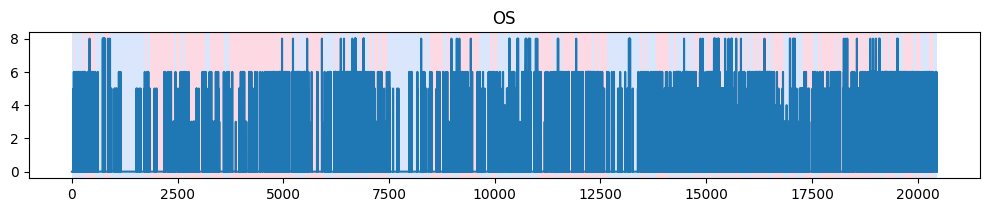

Change points for OS Version: [45, 80, 135, 275, 295, 370, 420, 550, 770, 855, 900, 1725, 1780, 1845, 2455, 2640, 2655, 2665, 3150, 3265, 4770, 4935, 4970, 5070, 5080, 5220, 5320, 5370, 5480, 5490, 5510, 5570, 5595, 5670, 5970, 6095, 6115, 6220, 6245, 6275, 6330, 6345, 6435, 6480, 6505, 6525, 6700, 6710, 6820, 6895, 6910, 7025, 7100, 7145, 7275, 7300, 7450, 8260, 8340, 8470, 8785, 8880, 8975, 9000, 9100, 9165, 9435, 9630, 9880, 9965, 9985, 10060, 10125, 10345, 10435, 10445, 10535, 10545, 10645, 10655, 10730, 10745, 10765, 10810, 10835, 10970, 11005, 11015, 11030, 11330, 11380, 11420, 11455, 11485, 11560, 11610, 11730, 11875, 11885, 11900, 11925, 11940, 11970, 12195, 12205, 12235, 12275, 12310, 12325, 12350, 12440, 12455, 12655, 13170, 13200, 13445, 13605, 13680, 13690, 13755, 13805, 13950, 13965, 14450, 14500, 14710, 14920, 15025, 15105, 15125, 15200, 15225, 15285, 15300, 15320, 15480, 15535, 15600, 15805, 15905, 16005, 16115, 16350, 16380, 16550, 16590, 16985, 17065, 17095, 17260, 173

<Figure size 1000x600 with 0 Axes>

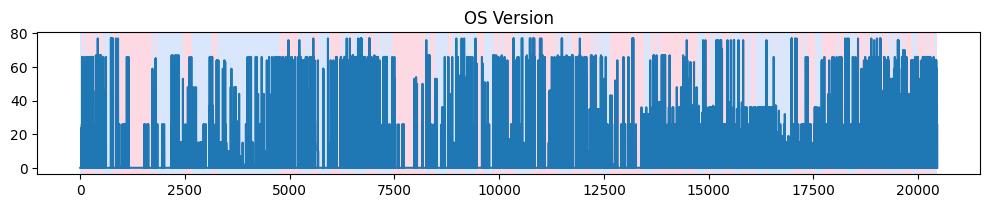

Change points for Device ID: [105, 190, 210, 220, 290, 350, 400, 410, 470, 510, 540, 585, 600, 630, 915, 1095, 1130, 1550, 1625, 1820, 1845, 1940, 1955, 2040, 2170, 2275, 2435, 2490, 2500, 2640, 2800, 2885, 2930, 2980, 3060, 3195, 3240, 3255, 3305, 3335, 3400, 3410, 3595, 3605, 3615, 3780, 3940, 3995, 4040, 4100, 4120, 4130, 4390, 4435, 4750, 4795, 4815, 4830, 4870, 4950, 4975, 5020, 5145, 5220, 5315, 5415, 5645, 5670, 5710, 5720, 5790, 5920, 5985, 6005, 6075, 6105, 6295, 6390, 6575, 6885, 7060, 7290, 7405, 7445, 7585, 7770, 7805, 7830, 7860, 7990, 8005, 8105, 8130, 8140, 8165, 8215, 8325, 8380, 8395, 8450, 8515, 8550, 8625, 8800, 9000, 9085, 9465, 9500, 9525, 9545, 9890, 9985, 10220, 10345, 10360, 10480, 10495, 10600, 10635, 10685, 10840, 10895, 10965, 11085, 11115, 11125, 11145, 11200, 11230, 11305, 11315, 11350, 11550, 11700, 11715, 12260, 12595, 12630, 12710, 12770, 12790, 12810, 12845, 13320, 13455, 13525, 13545, 13570, 13595, 13690, 13700, 13785, 14185, 14240, 14650, 15035, 15075

<Figure size 1000x600 with 0 Axes>

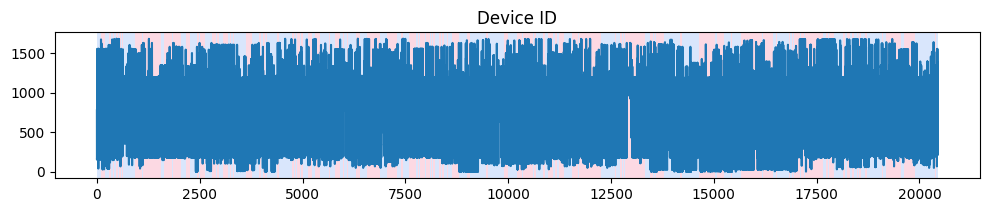

Change points for Happiness Score: [35, 230, 280, 320, 330, 410, 535, 565, 600, 770, 780, 800, 855, 875, 960, 1845, 2040, 2160, 2175, 2455, 2565, 2585, 2700, 2770, 2850, 2870, 2895, 3005, 3060, 3080, 3125, 3230, 3275, 3345, 3355, 3715, 3735, 3755, 3780, 3850, 3860, 3980, 3990, 4025, 4195, 4275, 4290, 4340, 4375, 4400, 4480, 4590, 4795, 4820, 4870, 5070, 5350, 5475, 5670, 5695, 6010, 6275, 6295, 6330, 6345, 6360, 6500, 6525, 6575, 6855, 6915, 6960, 7100, 7275, 7335, 7725, 7805, 7830, 7855, 7990, 8005, 8165, 8195, 8215, 8330, 8340, 8380, 8395, 8490, 8500, 8630, 8775, 8885, 8955, 8990, 9120, 9145, 9200, 9210, 9595, 9640, 9690, 9750, 9845, 9890, 9965, 9995, 10060, 10155, 10200, 10365, 10440, 10515, 10535, 10675, 10720, 10740, 10810, 10975, 10985, 11165, 11200, 11405, 11485, 11685, 11710, 11860, 11900, 12095, 12155, 12275, 12455, 12595, 12615, 12685, 13135, 13365, 13410, 13690, 13945, 14140, 14165, 14470, 14635, 14650, 14850, 14865, 14970, 15085, 15105, 15125, 15170, 15310, 15560, 15830, 15

<Figure size 1000x600 with 0 Axes>

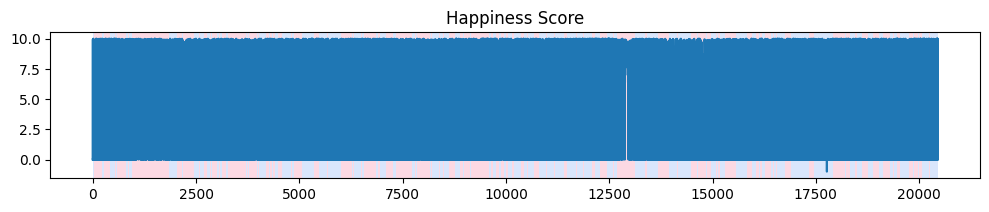

Change points for Playback Stalls: [1010, 1660, 2295, 2410, 2515, 2530, 2695, 2725, 2895, 2940, 2955, 2980, 3035, 3070, 3240, 3275, 3525, 3590, 3710, 3780, 3790, 3840, 3865, 3940, 3995, 4085, 4105, 4145, 4180, 4305, 5060, 5080, 5100, 6300, 6400, 6520, 6530, 6585, 7210, 7220, 8645, 8660, 8855, 8985, 9005, 9015, 9050, 9060, 9070, 9080, 9265, 9390, 10335, 10640, 10655, 10760, 11030, 11895, 11965, 12025, 12165, 12355, 12445, 13470, 13480, 13515, 13575, 13615, 13645, 13665, 13680, 13700, 13800, 13845, 13875, 13925, 13935, 13995, 14015, 14055, 14130, 14140, 14155, 14175, 14190, 14305, 14365, 14380, 14445, 14485, 14495, 14535, 14545, 14560, 14605, 14835, 14845, 14870, 14885, 14905, 14925, 14945, 14955, 14965, 14995, 15005, 15030, 15050, 15060, 15070, 15090, 15110, 15125, 15175, 15205, 15275, 15325, 15360, 15375, 15390, 15460, 15470, 15490, 15515, 15550, 15565, 15660, 15680, 15695, 15715, 15750, 15765, 15785, 15840, 15855, 15865, 15875, 15905, 15940, 15955, 15965, 16065, 16085, 16150, 16160, 1

<Figure size 1000x600 with 0 Axes>

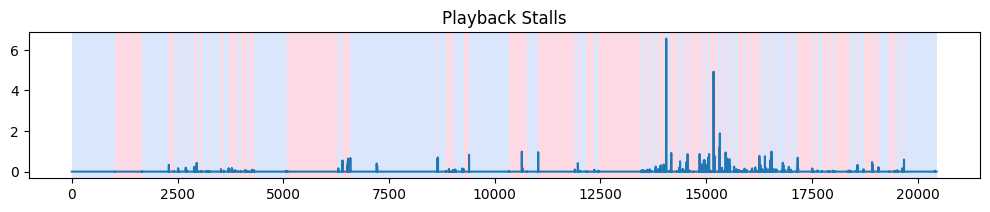

Change points for Startup Error (Count): [10, 770, 1725, 2325, 2420, 2515, 2600, 2615, 2660, 2770, 2785, 3230, 3410, 3480, 3505, 3535, 3565, 4085, 4250, 4270, 4280, 4290, 4720, 4925, 4985, 5030, 5220, 5485, 6080, 6575, 6620, 6695, 6710, 6745, 7030, 7170, 7320, 7405, 7475, 7550, 7615, 7865, 7950, 7965, 7980, 7990, 8005, 8140, 8195, 8305, 8380, 8450, 8645, 8840, 8885, 9050, 9120, 9235, 9500, 9570, 9620, 9890, 9975, 12205, 12990, 13385, 13410, 13560, 13695, 13775, 13805, 13835, 13860, 13930, 13965, 13985, 14010, 14025, 14085, 14455, 14650, 14665, 14870, 14970, 14980, 15010, 15215, 15225, 15245, 15265, 15280, 15325, 15390, 15425, 15495, 15745, 15905, 16130, 16235, 16275, 16320, 16345, 16460, 16525, 16540, 16560, 16655, 16750, 16775, 16785, 16885, 16915, 17400, 17655, 17690, 17800, 17815, 17945, 18105, 18120, 18280, 18670, 19385, 19425, 19530, 19715, 20075, 20330, 20452]


<Figure size 1000x600 with 0 Axes>

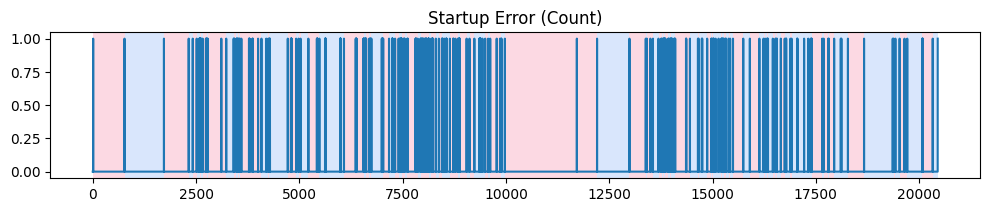

Change points for Latency: [190, 230, 280, 365, 460, 535, 555, 645, 805, 835, 850, 1095, 1255, 1340, 1470, 1610, 1660, 1685, 1725, 1755, 1800, 1855, 1890, 1910, 1935, 1960, 1985, 2030, 2040, 2075, 2100, 2165, 2175, 2240, 2275, 2330, 2385, 2455, 2590, 2700, 2830, 2955, 3030, 3040, 3130, 3225, 3375, 3410, 3735, 3775, 3860, 4080, 4265, 4285, 4385, 4405, 4565, 4850, 4860, 5170, 5295, 5480, 5800, 5835, 5895, 6295, 6855, 6940, 6965, 7100, 7220, 7275, 7310, 7335, 7805, 7855, 8090, 8155, 8195, 8340, 8380, 8445, 8545, 8635, 8955, 8985, 9120, 9200, 9245, 9425, 9480, 9490, 9595, 9675, 9995, 10070, 10140, 10385, 10515, 10565, 10640, 10675, 10700, 10735, 11030, 11165, 11175, 11345, 11555, 11685, 11885, 12155, 12225, 12420, 12690, 13410, 13535, 13555, 13700, 13730, 13795, 13825, 13845, 13950, 13965, 14180, 14345, 14360, 14375, 14385, 14400, 14445, 14635, 14765, 14820, 14865, 15215, 15230, 15245, 15375, 15415, 15435, 15685, 15715, 15790, 15925, 15980, 15995, 16050, 16215, 16260, 16405, 16775, 16865, 

<Figure size 1000x600 with 0 Axes>

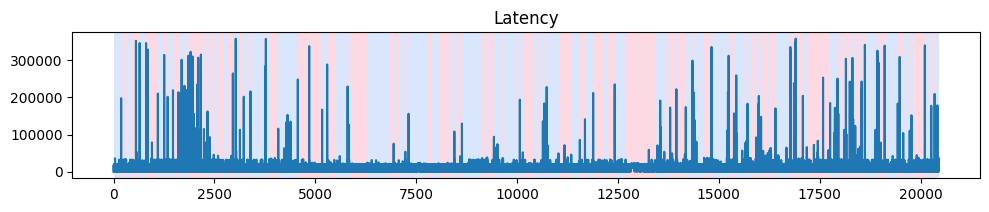

Change points for Crash Status: [10, 770, 1625, 1725, 2325, 2420, 2565, 2580, 2590, 2600, 2615, 2660, 2770, 2785, 2935, 2980, 3230, 3410, 3480, 3505, 3540, 3565, 3875, 3995, 4005, 4085, 4200, 4210, 4230, 4250, 4270, 4280, 4290, 4720, 4860, 4920, 4985, 5030, 5220, 5485, 5680, 6080, 6280, 6365, 6575, 6620, 6695, 6710, 6730, 6745, 6995, 7030, 7170, 7320, 7405, 7480, 7615, 7625, 7865, 7950, 7965, 7980, 7990, 8005, 8140, 8195, 8305, 8380, 8450, 8645, 8840, 8885, 9050, 9120, 9220, 9240, 9270, 9365, 9390, 9500, 9570, 9620, 9890, 9965, 9975, 11720, 12030, 12205, 12990, 13385, 13410, 13455, 13560, 13695, 13775, 13860, 13925, 13935, 13985, 14010, 14025, 14055, 14085, 14455, 14650, 14665, 14750, 14870, 14970, 14980, 15010, 15055, 15075, 15175, 15205, 15215, 15225, 15245, 15265, 15280, 15325, 15390, 15425, 15495, 15745, 15905, 16105, 16135, 16320, 16345, 16540, 16560, 16655, 16750, 16780, 16915, 17050, 17220, 17320, 17380, 17395, 17655, 17690, 17945, 18105, 18120, 18280, 18800, 19070, 19425, 19515

<Figure size 1000x600 with 0 Axes>

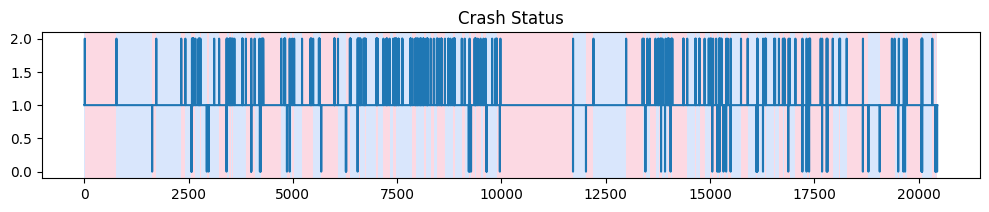

Change points for End of Playback Status: [10, 770, 935, 1010, 1625, 1725, 1985, 2310, 2325, 2420, 2515, 2575, 2585, 2600, 2615, 2640, 2660, 2695, 2705, 2770, 2785, 2935, 2980, 3230, 3480, 3505, 3540, 3565, 3780, 3790, 3875, 3995, 4005, 4085, 4210, 4230, 4250, 4270, 4280, 4290, 4720, 4925, 4985, 5030, 5220, 5485, 5680, 6080, 6365, 6525, 6550, 6575, 6620, 6695, 6710, 6730, 6745, 6995, 7030, 7170, 7320, 7405, 7480, 7615, 7865, 7950, 7965, 7980, 7990, 8005, 8140, 8165, 8195, 8305, 8380, 8450, 8635, 8645, 8840, 8885, 9050, 9120, 9135, 9240, 9270, 9365, 9390, 9500, 9570, 9620, 9640, 9890, 9975, 10640, 10760, 11715, 11870, 11965, 12030, 12205, 12690, 12990, 13385, 13410, 13560, 13695, 13775, 13835, 13845, 13860, 13935, 13985, 14000, 14055, 14085, 14175, 14455, 14515, 14535, 14560, 14650, 14665, 14750, 14830, 14845, 14870, 14970, 14980, 15010, 15050, 15075, 15160, 15175, 15205, 15215, 15225, 15245, 15265, 15280, 15325, 15385, 15425, 15495, 15665, 15745, 15905, 16085, 16105, 16130, 16240, 1627

<Figure size 1000x600 with 0 Axes>

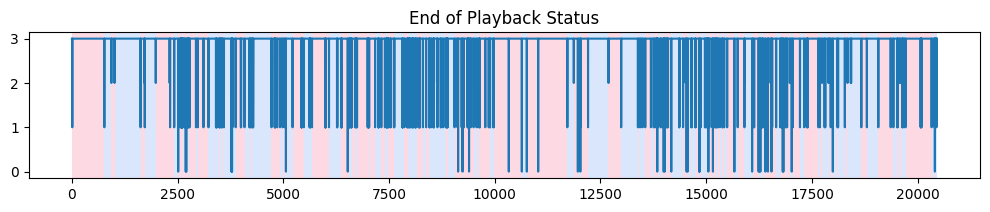

Change points for User_ID_N: [135, 185, 225, 490, 540, 900, 915, 1280, 1845, 2040, 2420, 2505, 2870, 2945, 3100, 3230, 3245, 3410, 3530, 3585, 3720, 3735, 3755, 3820, 3925, 3990, 4000, 4075, 4280, 4375, 4395, 4480, 4595, 4825, 4955, 5240, 5270, 5535, 5600, 5915, 6025, 6095, 6105, 6115, 6295, 6325, 6360, 6575, 6885, 7020, 7100, 7275, 7400, 7430, 7585, 7805, 8330, 8400, 8500, 8510, 8600, 8625, 8710, 8735, 8765, 8930, 9025, 9130, 9180, 9260, 9415, 9480, 9490, 9520, 9545, 9630, 9660, 9675, 9710, 9965, 9985, 9995, 10035, 10065, 10075, 10130, 10225, 10255, 10265, 10395, 10600, 10645, 10655, 10675, 10700, 10965, 11035, 11200, 11335, 11400, 11435, 11445, 11530, 11570, 11590, 11730, 11740, 11780, 11840, 11895, 11940, 12005, 12045, 12155, 12170, 12230, 12305, 12320, 12390, 12400, 12410, 12670, 13365, 13485, 13510, 13525, 13570, 13625, 13730, 13750, 13765, 13785, 13815, 13980, 14065, 14120, 14275, 14355, 14430, 14470, 14490, 14550, 14625, 14640, 14705, 14760, 14775, 15160, 15475, 15485, 15575, 15

<Figure size 1000x600 with 0 Axes>

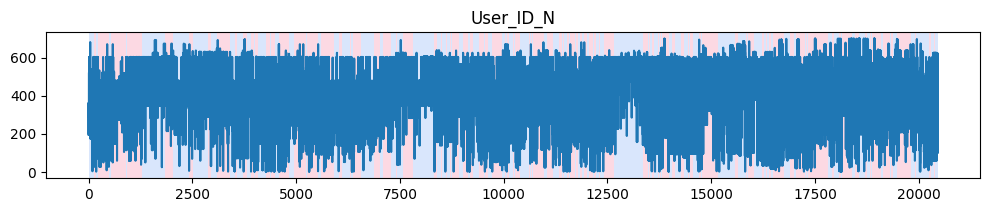

Change points for Title_N: [25, 135, 180, 210, 240, 280, 490, 550, 635, 670, 740, 750, 825, 990, 1170, 1240, 1255, 1385, 1400, 1565, 1640, 1730, 1820, 1850, 1860, 2100, 2215, 2425, 2435, 2450, 2675, 2785, 2950, 3180, 3305, 3495, 3650, 3705, 3770, 3980, 4025, 4290, 4345, 4455, 4935, 4975, 5780, 5855, 5920, 6110, 6185, 6210, 6940, 7300, 7320, 7360, 7460, 7505, 7540, 7585, 7640, 7740, 7760, 7795, 7830, 7870, 7965, 7990, 8000, 8195, 8215, 8245, 8305, 8355, 8380, 8475, 8490, 8515, 8550, 8590, 8640, 8760, 8865, 8955, 8980, 9050, 9270, 9640, 9680, 9700, 9780, 9820, 9890, 9955, 9985, 10110, 10140, 10265, 10355, 10565, 10585, 10745, 11020, 11135, 11285, 11330, 11490, 11515, 11535, 11570, 11920, 11975, 12030, 12180, 12195, 12390, 12400, 12580, 12650, 12770, 12790, 12810, 12820, 12845, 13190, 13380, 13525, 13655, 13955, 14015, 14110, 14155, 14260, 14395, 14430, 14500, 14525, 14645, 14670, 14695, 14740, 14985, 15000, 15080, 15150, 15195, 15280, 15410, 15430, 15540, 15580, 15685, 15850, 15915, 1596

<Figure size 1000x600 with 0 Axes>

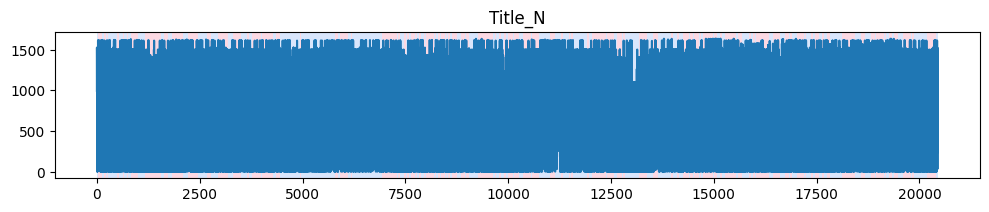

Change points for Device_Vendor_N: [45, 80, 295, 370, 470, 550, 745, 755, 900, 2420, 2435, 2455, 2560, 2655, 2770, 2905, 2995, 3155, 3325, 3340, 3375, 3390, 3410, 3435, 3480, 3510, 3570, 3590, 3705, 3780, 4080, 4095, 4280, 4290, 5070, 5080, 5320, 5370, 5480, 5570, 5595, 5920, 5970, 6025, 6060, 6095, 6115, 6220, 6245, 6275, 6330, 6480, 6495, 6525, 6710, 6820, 7025, 7100, 7145, 7275, 7300, 8340, 8470, 8810, 8825, 8850, 8980, 8990, 9085, 9095, 9165, 9630, 9965, 9985, 10435, 10445, 10645, 10655, 10730, 10765, 11325, 11380, 11420, 11455, 11560, 11610, 11715, 11875, 11885, 11895, 11925, 12005, 12195, 12205, 12275, 12325, 12350, 12440, 12455, 12655, 13445, 13680, 13690, 13765, 13825, 13860, 13870, 13950, 13965, 13985, 14015, 14155, 14175, 14240, 14450, 14570, 14835, 14875, 14895, 14920, 14945, 15025, 15095, 15105, 15160, 15285, 15465, 15480, 15535, 15560, 15675, 15890, 15905, 15965, 15995, 16005, 16075, 16100, 16115, 16315, 16350, 16410, 16470, 16545, 16590, 16825, 16860, 16895, 16925, 16945,

<Figure size 1000x600 with 0 Axes>

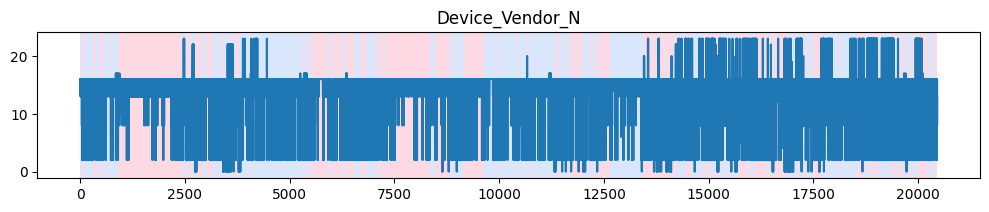

Change points for Device_Model_N: [45, 275, 1725, 1780, 1845, 2455, 2565, 2640, 2665, 2905, 2995, 3155, 3325, 3340, 3375, 3390, 3485, 3590, 3635, 3705, 5080, 5290, 5370, 5480, 5540, 5570, 5580, 5915, 5985, 6025, 6060, 6085, 6095, 6115, 6275, 6330, 6360, 6665, 6680, 6690, 7100, 7275, 7335, 7450, 8325, 8340, 8470, 8975, 9000, 9065, 9165, 9230, 9880, 9985, 10060, 10335, 10345, 10655, 11380, 11395, 11500, 11940, 12045, 12205, 12235, 12275, 12310, 12320, 12440, 13445, 13455, 13485, 13560, 13605, 13755, 13770, 13805, 13870, 13950, 14015, 14065, 14080, 14105, 14120, 14135, 14230, 14245, 14275, 14375, 14430, 14450, 14475, 14500, 14540, 14555, 14580, 14590, 14620, 14640, 14670, 14725, 14750, 14775, 14810, 14835, 14850, 14865, 14875, 14895, 14945, 15020, 15035, 15105, 15200, 15280, 15320, 15345, 15360, 15465, 15480, 15535, 15560, 15575, 15650, 15820, 15895, 15905, 15960, 15975, 16005, 16020, 16045, 16080, 16100, 16160, 16180, 16230, 16240, 16305, 16410, 16445, 16470, 16545, 16590, 16815, 16830, 

<Figure size 1000x600 with 0 Axes>

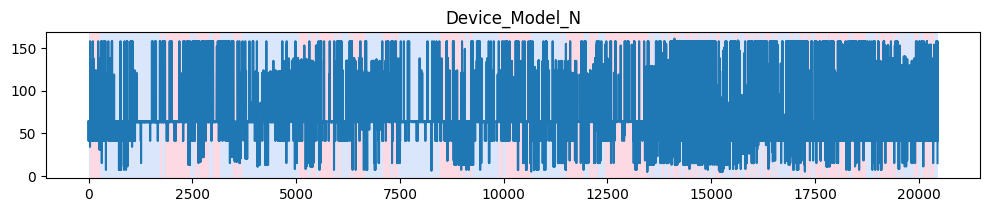

Change points for Content_TV_Show_N: [65, 370, 750, 1040, 1845, 2420, 2565, 2700, 2770, 2905, 2915, 2960, 3140, 3410, 3435, 3480, 3495, 3595, 3605, 3755, 3780, 4100, 4245, 4300, 4320, 4625, 4660, 4935, 5110, 5320, 5350, 5570, 5680, 5920, 5980, 6035, 6060, 6095, 6115, 6240, 6320, 6350, 6360, 6710, 6905, 8325, 8630, 8810, 8980, 9080, 9165, 9315, 10335, 10445, 10645, 10655, 10735, 10765, 11030, 11225, 11330, 11485, 11715, 11895, 12005, 12175, 12190, 12210, 12225, 12270, 13125, 13400, 13470, 13545, 13595, 13755, 13805, 13825, 13855, 13875, 13910, 13965, 13985, 14175, 14260, 14270, 14310, 14390, 14405, 14490, 14555, 14660, 14670, 14840, 14855, 14920, 14930, 14960, 14985, 15025, 15040, 15065, 15125, 15165, 15250, 15290, 15305, 15325, 15380, 15395, 15405, 15415, 15430, 15470, 15490, 15555, 15595, 15620, 15650, 15665, 15700, 15710, 15770, 15830, 15840, 15875, 15905, 15920, 16145, 16170, 16195, 16240, 16250, 16260, 16300, 16320, 16405, 16450, 16470, 16500, 16530, 16550, 16580, 16590, 16690, 167

<Figure size 1000x600 with 0 Axes>

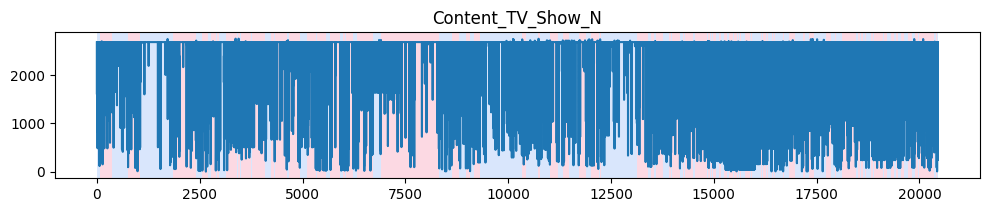

Change points for Country_N: [45, 80, 135, 275, 295, 370, 470, 550, 900, 2455, 2570, 2655, 3140, 3265, 3590, 3705, 4770, 5070, 5080, 5220, 5320, 5370, 5480, 5510, 5595, 5970, 6095, 6115, 6220, 6245, 6275, 6330, 6360, 6480, 6525, 6820, 7025, 7100, 7110, 7145, 7275, 8340, 8785, 8880, 9630, 9965, 9985, 10060, 10235, 10335, 10435, 10445, 10645, 10655, 10765, 11015, 11030, 11380, 11455, 11485, 11540, 11560, 11605, 11730, 11740, 11875, 11900, 12215, 12235, 12255, 12265, 12425, 12455, 12540, 12655, 13445, 13485, 13560, 13605, 13625, 13680, 13690, 13730, 13755, 13765, 13800, 13950, 13965, 14050, 14070, 14115, 14130, 14155, 14240, 14275, 14430, 14495, 14545, 14620, 14775, 14840, 14850, 14920, 15070, 15170, 15285, 15465, 15535, 15650, 15665, 15760, 15770, 15790, 15900, 15910, 15955, 15975, 16080, 16100, 16120, 16130, 16180, 16230, 16445, 16470, 16500, 16535, 16545, 16575, 16600, 16635, 16735, 16770, 17045, 17215, 17695, 17705, 17760, 17875, 17955, 17980, 18010, 18050, 18115, 18125, 18135, 18260,

<Figure size 1000x600 with 0 Axes>

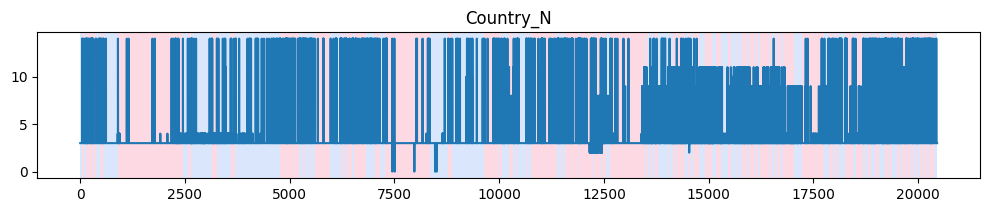

Change points for City_N: [45, 315, 370, 400, 435, 470, 485, 575, 725, 900, 1100, 1625, 1930, 1945, 1965, 2160, 2315, 2425, 2450, 2470, 2515, 2530, 2560, 2770, 2800, 2920, 3080, 3130, 3140, 3195, 3270, 3300, 3335, 3405, 3475, 3485, 3570, 3595, 3735, 3965, 3980, 3990, 4040, 4085, 4135, 4270, 4635, 4740, 4770, 4785, 4925, 4985, 5090, 5220, 5245, 5290, 5310, 5320, 5370, 5480, 5595, 5640, 5820, 5830, 6005, 6090, 6115, 6135, 6245, 6275, 6330, 6360, 6495, 6680, 6935, 7100, 7155, 7230, 7240, 7275, 7445, 7500, 8195, 8340, 8355, 8375, 8470, 8710, 9225, 9420, 9475, 9640, 9700, 9975, 10110, 10130, 10265, 10335, 10430, 10445, 10560, 10655, 10860, 10935, 11015, 11030, 11225, 11275, 11490, 11535, 11605, 11690, 11780, 11795, 11820, 12150, 12160, 12205, 12230, 12275, 12320, 12350, 12425, 12455, 12595, 12655, 12770, 13125, 13335, 13360, 13385, 13605, 13690, 13755, 13950, 14195, 14340, 14360, 14390, 14410, 14490, 14550, 14760, 15115, 15200, 15255, 15590, 15735, 15875, 15965, 16005, 16025, 16110, 16770, 

<Figure size 1000x600 with 0 Axes>

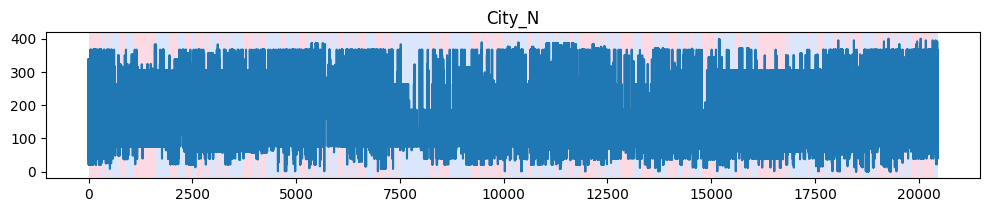

Change points for Region_N: [45, 80, 135, 275, 295, 370, 470, 550, 900, 2655, 3265, 4455, 4510, 4620, 4635, 4695, 4710, 4740, 4770, 4945, 5020, 5035, 5070, 5080, 5095, 5200, 5220, 5245, 5320, 5370, 5480, 5510, 5570, 5595, 5795, 5970, 6095, 6115, 6210, 6220, 6235, 6245, 6275, 6330, 6345, 6360, 6480, 6525, 6590, 6650, 6715, 6725, 6780, 6820, 6845, 6885, 6905, 6925, 6980, 7025, 7045, 7060, 7075, 7100, 7110, 7145, 7275, 7500, 8040, 8340, 8700, 8785, 8840, 8880, 8975, 9000, 9065, 9240, 9315, 9350, 9360, 9630, 9725, 9855, 9930, 9945, 9965, 9985, 10130, 10380, 10435, 10445, 10465, 10645, 10655, 10695, 10765, 10840, 11015, 11030, 11040, 11220, 11255, 11380, 11425, 11455, 11485, 11500, 11560, 11680, 11755, 11830, 11875, 11900, 12000, 12040, 12085, 12215, 12235, 12265, 12275, 12440, 12455, 12655, 12665, 12690, 12770, 12820, 13085, 13605, 13680, 13690, 13755, 13915, 13950, 13965, 14240, 14340, 14450, 14490, 14530, 14565, 14650, 17315, 17695, 17705, 17760, 17875, 17980, 18010, 18050, 18115, 18125,

<Figure size 1000x600 with 0 Axes>

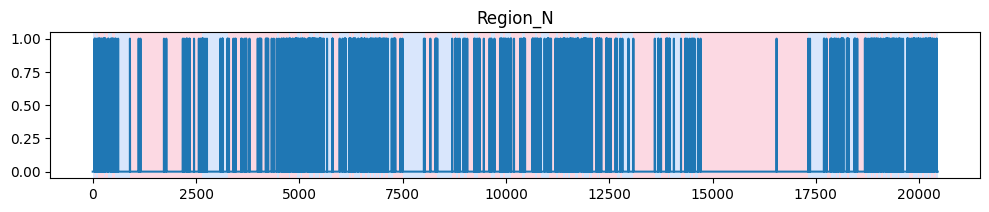

In [53]:
import ruptures as rpt

for column in df.columns:
    # Get the data for the current column
    actual_data = test_data[column].values
    forecast_data = dfv[column].values

    # Define the model
    model = "l2"  # "l1", "rbf", "linear", "normal", "ar"

    # Define the window width
    width = 7

    # Perform window-based change point detection for actual data
    # algo_actual = rpt.Window(width=width, model=model).fit(actual_data)
    # breakpoints_actual = algo_actual.predict(n_bkps=1)

    # Perform window-based change point detection for forecast data
    algo_forecast = rpt.Window(width=width, model=model).fit(forecast_data)
    breakpoints_forecast = algo_forecast.predict(n_bkps=200)

    # Print the change points
    # print(f"Change points for {column} (Actual): {breakpoints_actual}")
    print(f"Change points for {column}: {breakpoints_forecast}")

    # Plotting the signal and change points for actual data
    # plt.figure(figsize=(10,6))
    # rpt.display(actual_data, breakpoints_actual)
    # plt.title(f'{column} - Actual data')
    # plt.show()

    # Plotting the signal and change points for forecast data
    plt.figure(figsize=(10,6))
    rpt.display(actual_data, breakpoints_forecast)
    plt.title(f'{column}')
    plt.show()


From the result it shows that this method have better result than binary segmentation method. And same as binary segmentation, window based method also shows Playtime features have most change point detected other than any features in the given dataset. 

This two result confirms that irregural fluctuation happen causes of playtime features.

From all of the result, it shows that user action causes playtime stop and the result of this action is irregular fluctuation appear everytime user stop playing the video. From previous experiment also shows that playtime features have strong correlation with latency which confirms by forecasting shows this two features have the worst RMSE result. It can say bad latency causes users to stop playing the video. This event causes irregular fluctuation in the data and thus, spread residual data to every features. From change detection it also shows this residual appear almost every time which shows there is problem with latency in the network. 